# AAIC Self Case Study Title: <br>

# <font color='deep blue'>“Airbnb new users’ bookings”- Where will a new guest book their first travel experience.</font>

-------------

## Introduction:

Airbnb (stands for Air Bed and Breakfast) is an American company that operates an online marketplace for 
lodging, primarily home stays for vacation rentals, and tourism activities. The Airbnb platform is accessible 
via website and mobile app. Users can log in or sign up into their Airbnb accounts for booking various 
accommodations. Hosts can list their extra space, receive hosting tips and support, and earn money while guests 
can discover the perfect place to stay and explore new experiences while travelling. Airbnb does not own any of 
the listed properties, instead, it profits by receiving commission from each booking, thus acting like a connection 
between the hosts and the guests.


## Business Problem:

So, it makes complete sense for Airbnb if they can accurately predict where a new user will book their first travel 
experience, thus it can share more personalized content with their community, decrease the average time of
first booking, and better forecast demand. <br><br>
Whenever a new user signs up in the Airbnb platform, based on the entry details or some details that are 
extracted by the site while signing up, it wants to accurately predict the country where the new user might book 
in, such that the user is recommended personalized places for stay based on predictions made which might help 
the user in the searching and booking process thus focusing on user support.<br><br>
Also, Airbnb can have a look at the number of bookings a country might have in the near future, which can help 
Airbnb to forecast the demand for a country and thus can take necessary steps to make arrangements in a short 
span of time. 

## ML formulation of the business problem:

So, given some details of a new user like demographic details, web session records and summary statistics, who 
has just signed up in the Airbnb platform, we want to predict in which country the new user will book into. 
There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 
'NDF' (no destination found), and 'other'. Thus this becomes a multi-class classification problem.<br><br>
Also, we can predict a maximum of 5 countries for the new user, thus ranking is going to matter in this 
classification problem. Since ranking matters, we need some values based on which we will be ranking the 
countries and will extract the top 5 countries.



## Business Constraints:


- **Low latency requirement:**<br>
It is so because as soon as the new user signs up, we want to predict the destination country in a 
reasonably low time. It might not be in milli seconds but a couple of minutes would be fine so that 
personalized content can be shown to the user then and there.
- **Interpretability:**<br>
At the end of the day, we want to know why a particular country is shown as the destination country for 
a new user or which features are more important for the task at hand.
- **Probability scores are required:**<br>
As said above that the ranking is going to matter in this classification task. So we will rank the items in 
decreasing order of the probability scores such that the most probable country to be booked in by the 
new user appears at the top. Also we want to have a look at how probable a user want to travel to all 
destinations and not just the country with highest probability

## Dataset

**Source:** https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data


### **There are 5 datasets provided to us in total.**

**Train_users.csv:** <br> It contains around 200k users’ data that are being stored in database while a new user is 
signing up. The data ranges from the year 2010 to 2014. Along with the entry details of a new user, it also 
contains the data of destination country column where he/she booked in for the first time. The various columns 
and their overview and type are:
- Id (primary key): unique id of each user
- date_account_created (date): the date of account creation
- timestamp_first_active (timestamp): timestamp of the first activity, note that it can be earlier 
than date_account_created or date_first_booking because a user can search before signing up
- date_first_booking (date): date of first booking
- gender (categorical): gender of the user
- age (numerical): age of the user
- signup_method (categorical): the method followed by the user while signing up
- signup_flow (categorical): the page a user came to signup up from
- language (categorical): international language preference
- affiliate_channel (categorical): what kind of paid marketing
- affiliate_provider (categorical): where the marketing is e.g. google, craigslist, other
- first_affiliate_tracked (categorical): whats the first marketing the user interacted with before the 
signing up
- signup_app (categorical): the app used by the user for signing up
- first_device_type (categorical): the device used by the user for signing up
- first_browser (categorical): the first browser used by the user for signing up
- country_destination (target variable): the destination country where the user booked in for the first 
time


**Test_users.csv:**<br> 
This dataset contains data about 62k users on which we have to do our prediction. The columns 
are exactly same as in the train_users dataset except the ‘country_destination’ column which we are to predict.


**Sessions.cvs**<br>
Contains data of around 10M records of the web session logs of the users. But the data is for the 
year 2014 only. The various columns and their type and overview are:
- user_id (foreign key): to be joined with the column 'id' in users table. Thus there can be multiple rows 
for a particular user id
- action (categorical): the action user was performing
- action_type (categorical): the type of the action 
- action_detail (string/categorical): details regarding the action that the user performed
- device_type (categorical): device through which the user performed some action
- secs_elapsed (numerical): the time spent by the user in doing some action


**Age_gender_bkts.csv:**<br>
Summary statistics of users' age group, gender, country of destination. The dataset 
contains data for the year 2015 only. The various columns are:
- Age_bucket (interval): the age interval in which a user might belong
- Country_destination (categorical): the country where a new user booked in
- Gender (categorical): gender of the user
- Population_in_thousands (numerical): numbers falling in a particular age group, gender and did book a 
particular destination place as their first booking
- Year (year): the year in which the booking is made


**Countries.csv:**<br> 
Summary statistics of destination countries in this dataset and their locations. The dataset has 6 
columns:
- Country_destination (categorical): the name of the country
- Lat_destination (numerical): the latitude value
- Lng_destination (numerical): the longitude value
- Distance_km (numerical): distance in kms from US
- Distance_km2 (numerical): might be the area 
- Destinantion_language (categorical): language spoken in that country
- Language_levenshtein_distance (numerical): The levensthein distance between the spoken language 
and english


## Performance metrics:

- **Multi-class Log-loss:**<br> 
Since we want probabilities for the destination countries to know how probable it is 
for a user to book their first travel experience in a particular country and we also know that log-loss uses 
actual probability scores and it tries to penalize small deviations from ideal situation, thus we want to 
use log-loss as the metric.<br><br>
- **Confusion, precision, recall matrices:** Since this is a problem of multi-class classification and our data is highly imbalanced, we want to look at the confusion, precision and recall matrices for each class to know that for which all classes our model is doing good and for which all classes it is getting confused with other classes.<br><br>
- **NCDG:**<br> We mentioned that ranking is important for us in this classification task and we would just be 
considering the top 5 countries with the highest of probability scores, to measure the strength of 
ranking, we will use NCDG as a metric.

# Code:
---

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import regex as re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import math
import pickle

from wordcloud import WordCloud

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

## Exploratory Data Analysis

**Loading the datasets**

In [110]:
#train data

df_train=pd.read_csv("train_users_2.csv")
print("shape of train dataset",df_train.shape)
print("--"*50)
df_train.head()

shape of train dataset (213451, 16)
----------------------------------------------------------------------------------------------------


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,28-06-2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,25-05-2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,28-09-2010,2.009060e+13,02-08-2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,05-12-2011,2.009100e+13,08-09-2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,14-09-2010,2.009120e+13,18-02-2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
#session data

df_ses=pd.read_csv("sessions.csv")
print("shape of session dataset",df_ses.shape)
print("--"*50)
df_ses.head()

shape of session dataset (10567737, 6)
----------------------------------------------------------------------------------------------------


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [4]:
#country data

df_country=pd.read_csv("countries.csv")
print("shape of country dataset",df_country.shape)
print("--"*50)
df_country.head()

shape of country dataset (10, 7)
----------------------------------------------------------------------------------------------------


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


In [5]:
#age data

df_age=pd.read_csv("age_gender_bkts.csv")
print("shape of age dataset",df_age.shape)
print("--"*50)
df_age.head()

shape of age dataset (420, 5)
----------------------------------------------------------------------------------------------------


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
#test dataset

df_test=pd.read_csv("test_users.csv")
print("shape of test dataset",df_test.shape)
print("--"*50)
df_test.head()

shape of test dataset (62096, 15)
----------------------------------------------------------------------------------------------------


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


Comments-
>- We will be doing extensive EDA on the train and sessions datasets because we need to gain a lot of insights about how our data is.<br><br>
>- We will be discarding the age and country datasets for now because if we have to merge the country data then we have to be using the destination countries but that is the target variable we are going to predict in the test dataset, so discarding the country makes sense. And we are also discrading the age dataset beacuse with our research we came to know that the train data contains record from the year 2010 to 2014, and in the age data, the year is given as 2015, so it makes no sense to merge this data into the main train data and also not much important features are present in the dataset.

    

**Train dataset information**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

**checking for null values**

In [6]:
df_train.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
#calculating the percentage for missing value features
print("% of missing values for age column:",round(df_train.age.isna().sum()/len(df_train)*100,4),"%")
print("% of missing values for first_affiliate_tracked column:",round(df_train.first_affiliate_tracked.isna().sum()/len(df_train)*100,4),"%")

% of missing values for age column: 41.2226 %
% of missing values for first_affiliate_tracked column: 2.8414 %


Comments-
>- We will be dropping the 'date_first_booking' beacuse in our test dataset, all the values for this feature will be nan because we will be predicting for future users who haven't yet booked into any hotels.
>- We have to impute the age feature with some suitable means to fill the missing values since round 41% of the values are missing.
>- Since for first_affiliate_track, the % of missing values is less, we can impute it with the mode value.

In [8]:
#checking for null values in the test dataset
df_test.isna().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [9]:
print("% of missing values for age column:",round(df_test.age.isna().sum()/len(df_test)*100,4),"%")
print("% of missing values for first_affiliate_tracked column:",round(df_test.first_affiliate_tracked.isna().sum()/len(df_test)*100,4),"%")

% of missing values for age column: 46.5022 %
% of missing values for first_affiliate_tracked column: 0.0322 %


Comments-
>- We see a similar pattern in the missing values for train and test datsets. So we will fill the missing values of the test dataset in the same ways as we will do for the train dataset.

In [111]:
#dropping the 'date_first_booking' column
df_train.drop('date_first_booking',axis=1,inplace=True)
df_test.drop('date_first_booking',axis=1,inplace=True)

## <b> Analysis on train dataset:</b>

<b> Plot for destination countries


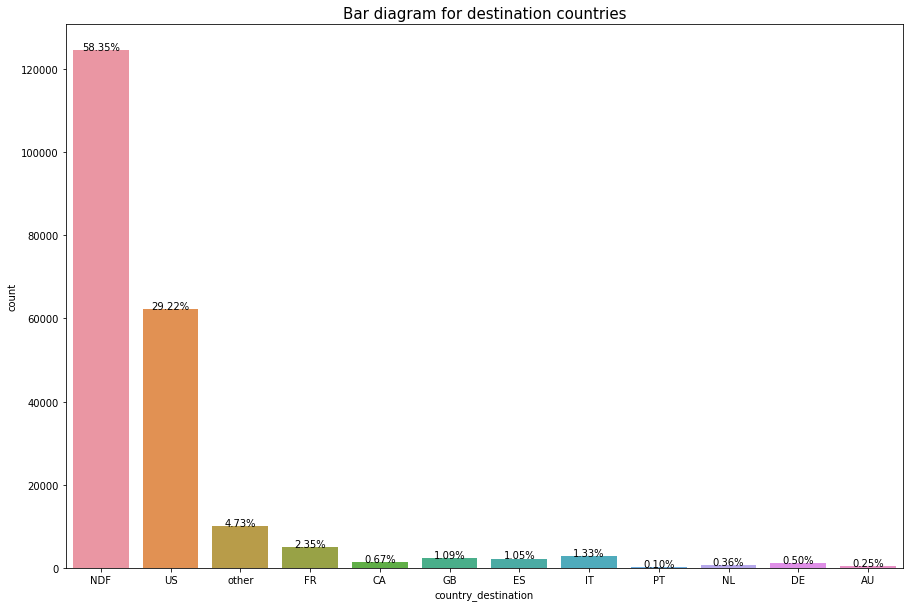

In [11]:
#credits- https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

plt.figure(figsize=(15,10))
ax=sns.countplot(df_train['country_destination'])
plt.title('Bar diagram for destination countries',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments:
>- Here we see that more tha 50% of the train users, ie, 58% approx haven't yet done any booking to a country. 
>- So the country with the highest number of bookings is US, ie, 29% of the users booked into US as their first booking. 
>- 'Other' constitutes all the countries that are not listed here. Around 4-5% of the users booked into the unlisted countries as their first booking.
>- The next popular country is France where 2% of the train users booked in for first time, followed by Italy, Great Britain, Spain and so on.

Thus we conclude that our dataset is highly imbalanced.

## Metrics to be used:

>- **Multi-class log-loss:** Since we want the probability scores with which a country is chosen to be an user's first destination booking and we know that log-loss will penalize even the small deviations in probability scores, thus we chose this metric.
> <br><br>
>- **Confusion, precision, recall matrices:** Since this is a problem of multi-class classification and our data is highly imbalanced, we want to look at the confusion, precision and recall matrices for each class to know that for which all classes our model is doing good and for which all classes it is getting confused with other classes.
> <br><br>
>- **Marco and micro f1-scores:** We can also have a look at the micro and macro f1-scores to get a better clarity about the overall metric based on the multiple class labels.

**Plot for user's gender**

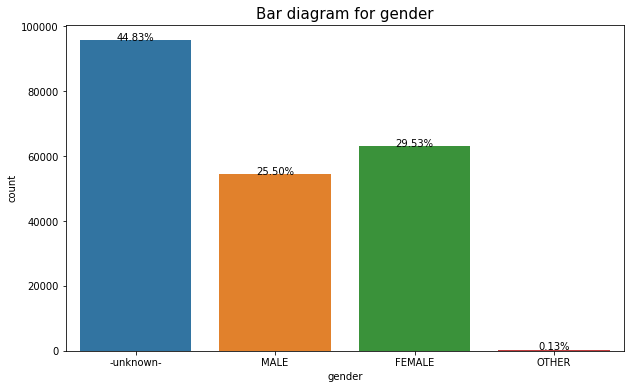

In [8]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df_train['gender'])
plt.title('Bar diagram for gender',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments-
>- There is no significant difference between the no. of male users and female users.
>- Around 44% of the users have not revealed their gender. These can be considered as missing values which might be a problem for our models, thus we have to come up with ways to fill these. We can randomly fill these with either male or female since there is not much difference between them and in this way no preference will be given to any gender.

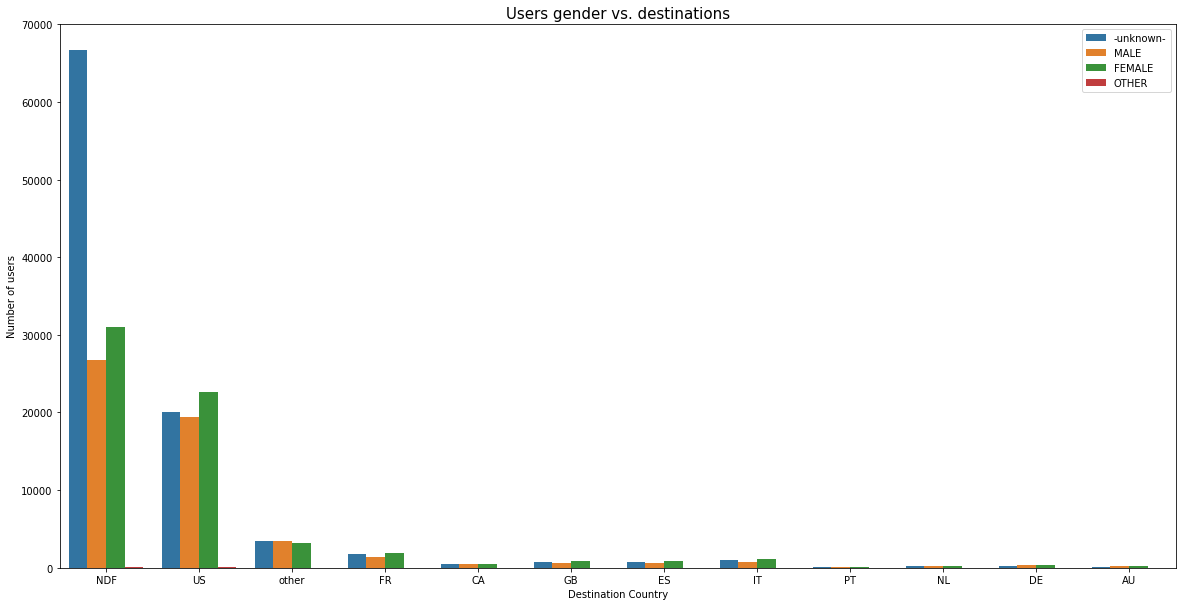

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='country_destination', data = df_train, hue = 'gender')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users gender vs. destinations',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comments-
>- We see for almost for every destination country, the no. of females is slightly higher than males or more or less equal. 

In [13]:
print("Proportions of males and females:")
print("--"*50)
print("Females:",round(len(df_train[df_train.gender=='FEMALE'])/len(df_train[(df_train.gender=='FEMALE') | (df_train.gender=='MALE')])*100,4),"%")
print("Males:",round(len(df_train[df_train.gender=='MALE'])/len(df_train[(df_train.gender=='FEMALE') | (df_train.gender=='MALE')])*100,4),"%")

Proportions of males and females:
----------------------------------------------------------------------------------------------------
Females: 53.6606 %
Males: 46.3394 %


In [112]:
#imputing the '-unknown-' category either with males or females keeping the males-females proportion same as before

for i,data in tqdm(df_train.iterrows()):
    if data['gender'] == '-unknown-':
        a=np.random.uniform()
        if a <= 0.54:
            df_train.at[i,'gender']='FEMALE'
        else:
            df_train.at[i,'gender']='MALE'
            

print("Proportions of males and females after imputation:")
print("--"*50)
print("Females:",round(len(df_train[df_train.gender=='FEMALE'])/len(df_train[(df_train.gender=='FEMALE') | (df_train.gender=='MALE')])*100,4),"%")
print("Males:",round(len(df_train[df_train.gender=='MALE'])/len(df_train[(df_train.gender=='FEMALE') | (df_train.gender=='MALE')])*100,4),"%")

213451it [00:45, 4735.64it/s]


Proportions of males and females after imputation:
----------------------------------------------------------------------------------------------------
Females: 53.7086 %
Males: 46.2914 %


In [15]:
#imputing the '-unknown-' category either with males or females keeping the males-females proportion same as before in test dataset also

for i,data in tqdm(df_test.iterrows()):
    if data['gender'] == '-unknown-':
        a=np.random.uniform()
        if a <= 0.54:
            df_test.at[i,'gender']='FEMALE'
        else:
            df_test.at[i,'gender']='MALE'

62096it [00:05, 10961.62it/s]


**Plot for gender after imputation**

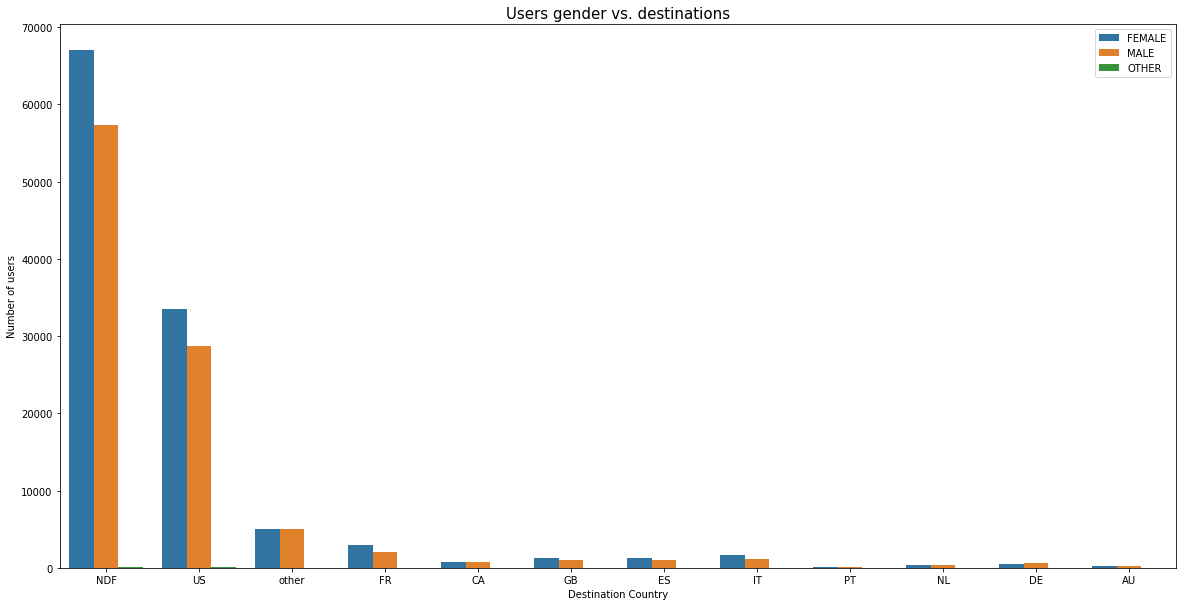

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='country_destination', data = df_train, hue = 'gender')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users gender vs. destinations',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comment-
>- We see that distribution of males and females is very similar before and after imputation. Thus we can conclude that the imputation worked as we wanted.

**Plot for user's age**

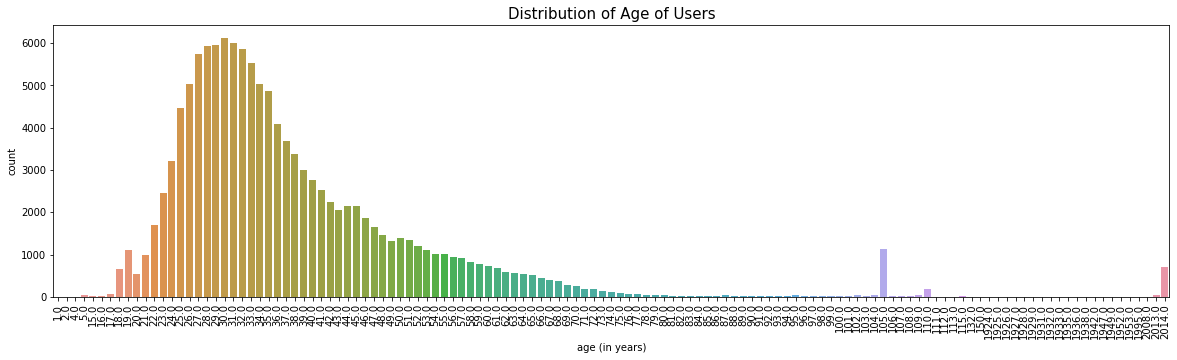

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(df_train.age)
plt.title("Distribution of Age of Users",fontsize=15)
plt.xlabel("age (in years)")
plt.xticks(rotation=90)
plt.show()

**Outlier detection**

In [39]:
#percentile values
for i in range(10,101,10):
    print("{0}th percentile value is {1}".format(i,np.nanpercentile(df_train.age,i)))

10th percentile value is 25.0
20th percentile value is 27.0
30th percentile value is 29.0
40th percentile value is 32.0
50th percentile value is 34.0
60th percentile value is 36.0
70th percentile value is 40.0
80th percentile value is 46.0
90th percentile value is 56.0
100th percentile value is 2014.0


In [40]:
for i in range(90,100):
    print("{0}th percentile value is {1}".format(i,np.nanpercentile(df_train.age,i)))

90th percentile value is 56.0
91th percentile value is 57.0
92th percentile value is 58.0
93th percentile value is 60.0
94th percentile value is 62.0
95th percentile value is 64.0
96th percentile value is 67.0
97th percentile value is 71.0
98th percentile value is 93.0
99th percentile value is 105.0


In [238]:
print("Null values for age:",df_train.age.isna().sum())

Null values for age: 87990


In [239]:
df_train.age.min()  #min value for age

1.0

In [240]:
df_train.age.max()  #max value for age

2014.0

In [241]:
df_train.age.median()  #median value for age

34.0

In [242]:
df_train.age.mean()  #mean value for age

49.66833517985669

Comments:
>- So we notice that there are a lot of anomalies present in the age column like the max age is 2014 which means some user might have given the value of some year instead of age.
>- Also the min age is 1 year which is also an anomaly and these values needs to be replaced with some suitable ones.
>- The percentiles seems reasonable but one thing to keep in mind is that the percentiles are calculated based on non-null values. The values might change after the anomalies are treated.
>- The mean and median ages seems fine though but after filling the null values these might change.

**Treating the outliers and null values for age**

>- We setting a lower bound that is age 18 and a upper bound that is age 95. Any user's age that is lower that 18 will be replaced by 18 and if any user's age is above 95, it will be replaced by 95.
>- We are replacing the null values between the 25th and 75th percentile.

In [113]:
#replacing the extreme outliers with upper and lower bounds
df_train.age=df_train.age.apply(lambda x: 18 if x<18 else x)
df_train.age=df_train.age.apply(lambda x: 95 if x>95 else x)

In [27]:
#doing the above for test dataset also

df_test.age=df_test.age.apply(lambda x: 18 if x<18 else x)
df_test.age=df_test.age.apply(lambda x: 95 if x>95 else x)

In [28]:
#25th and 75th percentile
print("25th percentile:",np.nanquantile(df_train.age,0.25))
print("75th percentile:",np.nanquantile(df_train.age,0.75))

25th percentile: 28.0
75th percentile: 43.0


In [114]:
#treating the null values for age
for i,data in tqdm(df_train.iterrows()):
    if math.isnan(data['age']):
        df_train.at[i,'age']=np.random.randint(28,43)

print("Null values of age after imputation:",df_train.age.isna().sum())

213451it [00:40, 5270.11it/s]

Null values of age after imputation: 0


In [30]:
#treating the null values for age for test dataset
for i,data in tqdm(df_test.iterrows()):
    if math.isnan(data['age']):
        df_test.at[i,'age']=np.random.randint(28,43)

62096it [00:05, 11275.26it/s]


**Violin-plot for user's age country-wise**

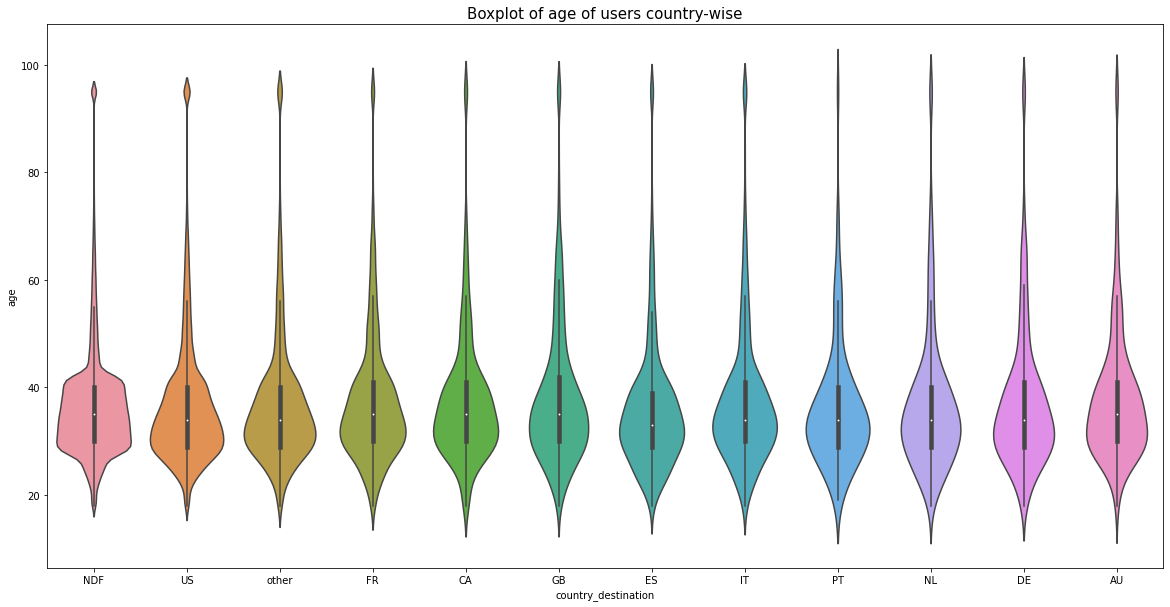

In [158]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df_train.country_destination,y=df_train.age)
plt.title("Boxplot of age of users country-wise",fontsize=15)

plt.show()

Comments-
>- Here we did plot the violin-plots of user's age country-wise to see if by any means the age of users is somehow affecting their first booking destinations or not. But we see no significant difference among the box-plots concluding age might not be that important factor for deciding a user's first destination. 
>- But we can still notice a few things like users with a lower age, ie, 18-22 years of age prefer to travel to places like Portugal,Netherlands,Germany and Australia.
>- A very small group of users whose age is above 90 travel within US or sometimes other countries not listed here.

**Plot for first_affiliate_tracked**

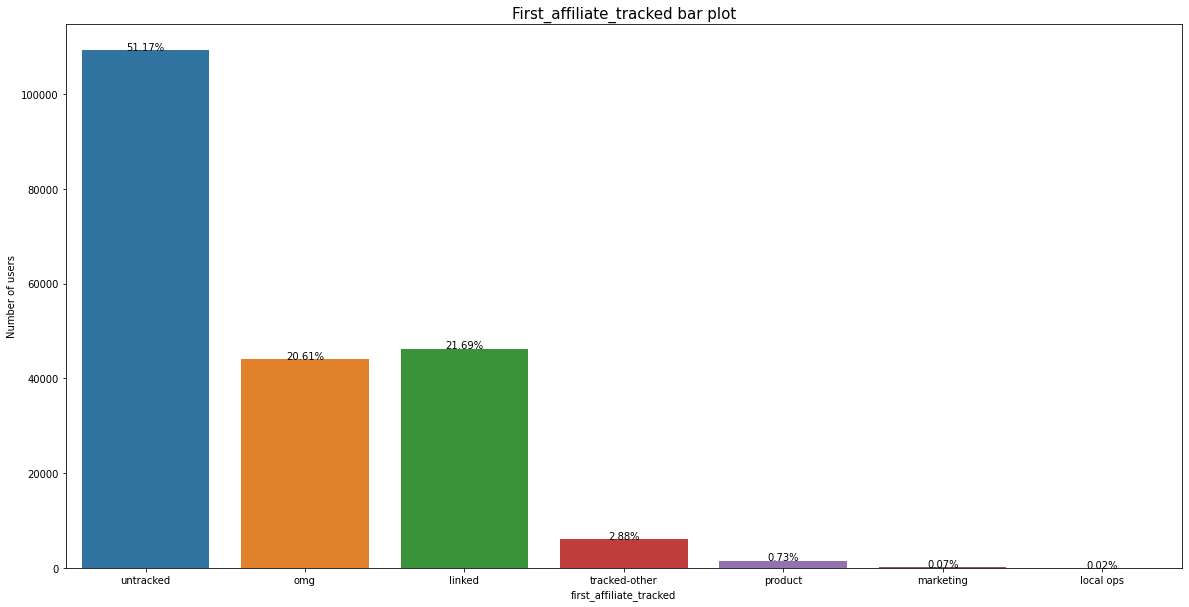

In [160]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df_train['first_affiliate_tracked'])
plt.ylabel('Number of users')
plt.title('First_affiliate_tracked bar plot',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments-
>- We see that 51.17% users' first_affiliate_track is untracked followed by majorly omg (20.61%) and linked (21.69%).

In [115]:
#imputing the null values with the mode value of the feature
print("No. of null values:",df_train['first_affiliate_tracked'].isna().sum())

df_train['first_affiliate_tracked'].fillna(df_train['first_affiliate_tracked'].mode()[0],inplace=True)

print("No. of null values after imputation:",df_train['first_affiliate_tracked'].isna().sum())

No. of null values: 6065
No. of null values after imputation: 0


In [32]:
#imputing the null values in the test dataset with the mode value of the feature 
df_test['first_affiliate_tracked'].fillna(df_train['first_affiliate_tracked'].mode()[0],inplace=True)

**Plot for user's languages**

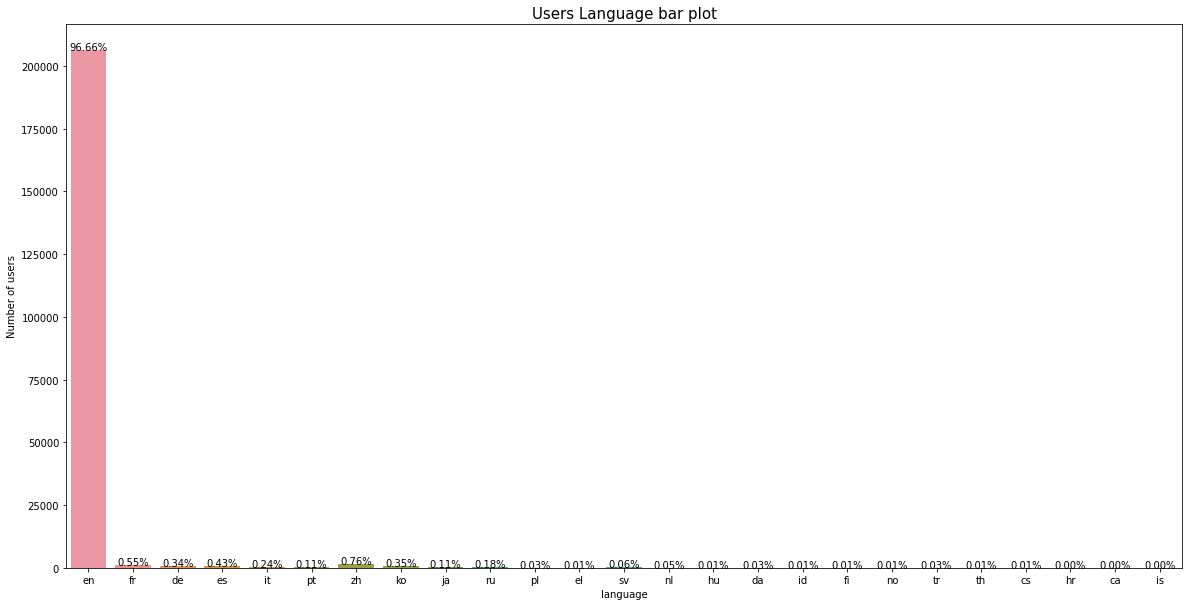

In [247]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df_train['language'])
plt.ylabel('Number of users')
plt.title('Users Language bar plot',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [248]:
print("Percetage distribution for language:")
print("--"*50)
x=dict(round(df_train.language.value_counts()/len(df_train)*100,4))
for i,j in x.items():
    print(i,"---",j,"%") 

Percetage distribution for language:
----------------------------------------------------------------------------------------------------
en --- 96.6564 %
zh --- 0.7646 %
fr --- 0.5491 %
es --- 0.4287 %
ko --- 0.35 %
de --- 0.3429 %
it --- 0.2408 %
ru --- 0.1822 %
pt --- 0.1124 %
ja --- 0.1054 %
sv --- 0.0572 %
nl --- 0.0454 %
tr --- 0.03 %
da --- 0.0272 %
pl --- 0.0253 %
cs --- 0.015 %
no --- 0.0141 %
el --- 0.0112 %
th --- 0.0112 %
id --- 0.0103 %
hu --- 0.0084 %
fi --- 0.0066 %
ca --- 0.0023 %
is --- 0.0023 %
hr --- 0.0009 %


Comments-
>- Around 96.6% of the users have 'English' as their native language. It might happen that most of the users are from US and thus they mostly travel within US only since previously we saw that 1st most popular travel destination is US for first time bookers..
>- All other languages constitute around 3-4% of users' native languages.

**Plot for affiliate channel**

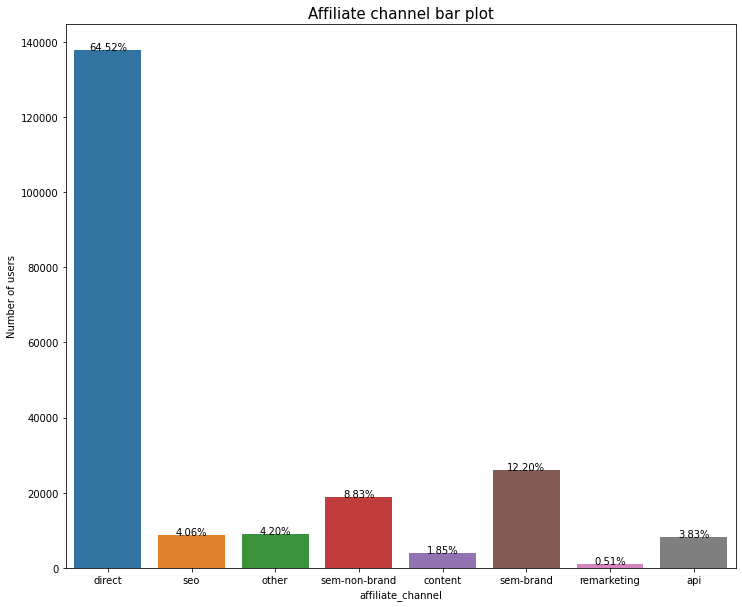

In [249]:
plt.figure(figsize=(12,10))
ax=sns.countplot(df_train['affiliate_channel'])
plt.ylabel('Number of users')
plt.title('Affiliate channel bar plot',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments-
>- Majority of the users, ie, 64% of the users use affiliate_channel as direct, followed by sem-brand and sem-non-brand. 

**Plot for signup_flow**

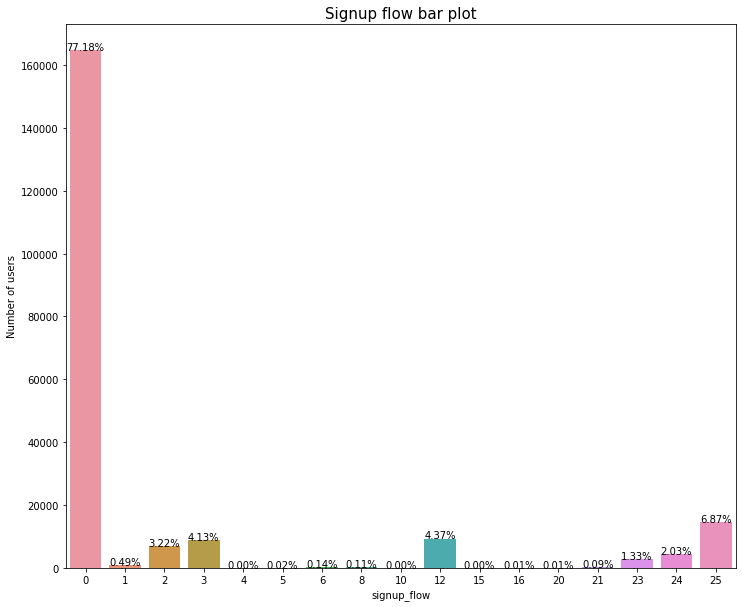

In [250]:
plt.figure(figsize=(12,10))
ax=sns.countplot(df_train['signup_flow'])
plt.ylabel('Number of users')
plt.title('Signup flow bar plot',fontsize=15)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments-
>- Most of users signed up into their account at first go. Some of the users did check out a couple of the pages before signing up. Also some users did checkout a lot of pages before signing up.

In [251]:
#separting the users where first booking is done vs no booking is done
df_booking_US=df_train[df_train.country_destination=='US']
df_booking_rest=df_train[(df_train.country_destination!='US') & (df_train.country_destination!='NDF')]
df_NDF=df_train[df_train.country_destination=='NDF']

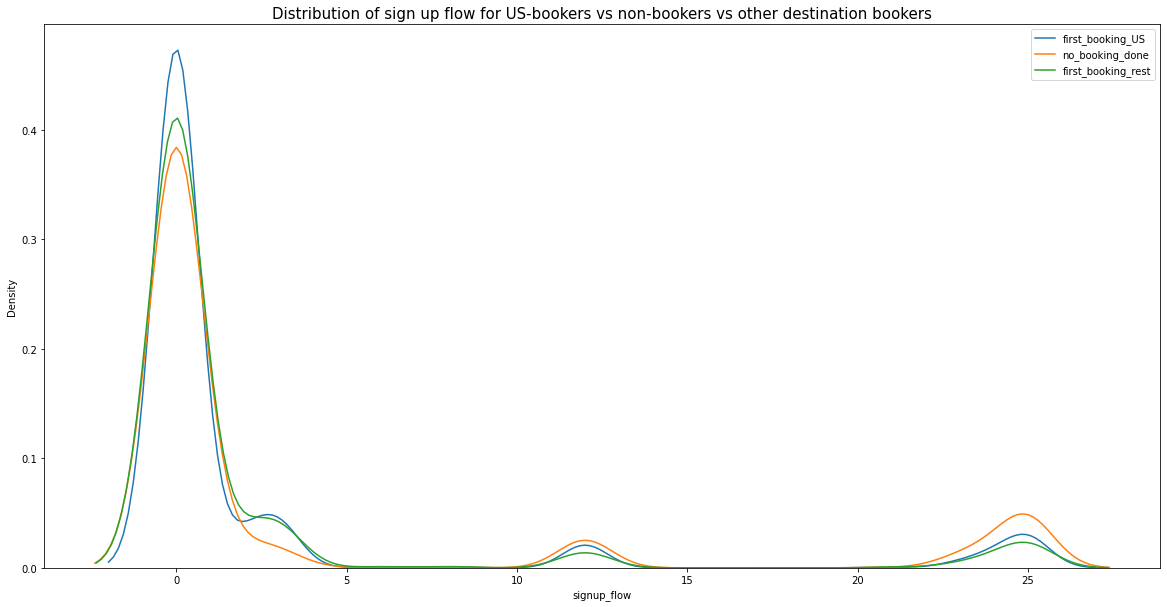

In [252]:
plt.figure(figsize=(20,10))
sns.distplot(df_booking_done.signup_flow,hist=False,label='first_booking_US')
sns.distplot(df_NDF.signup_flow,hist=False,label='no_booking_done')
sns.distplot(df_booking_rest.signup_flow,hist=False,label='first_booking_rest')
plt.title("Distribution of sign up flow for US-bookers vs non-bookers vs other destination bookers",fontsize=15)
plt.legend()
plt.show()

Comments-
>- the different signup flow graphs are very much overlapping still we can see some differences like, where the signup flow is very less,ie, in the range of 0-5, there is a high chance that a booking is done for US followed by other countries and whereas when the signup flows are moderate (10-15) or high(23-25), there is a higher chance of no bookings. So this might a useful feature by some means.

**Plot for affiliate provider**

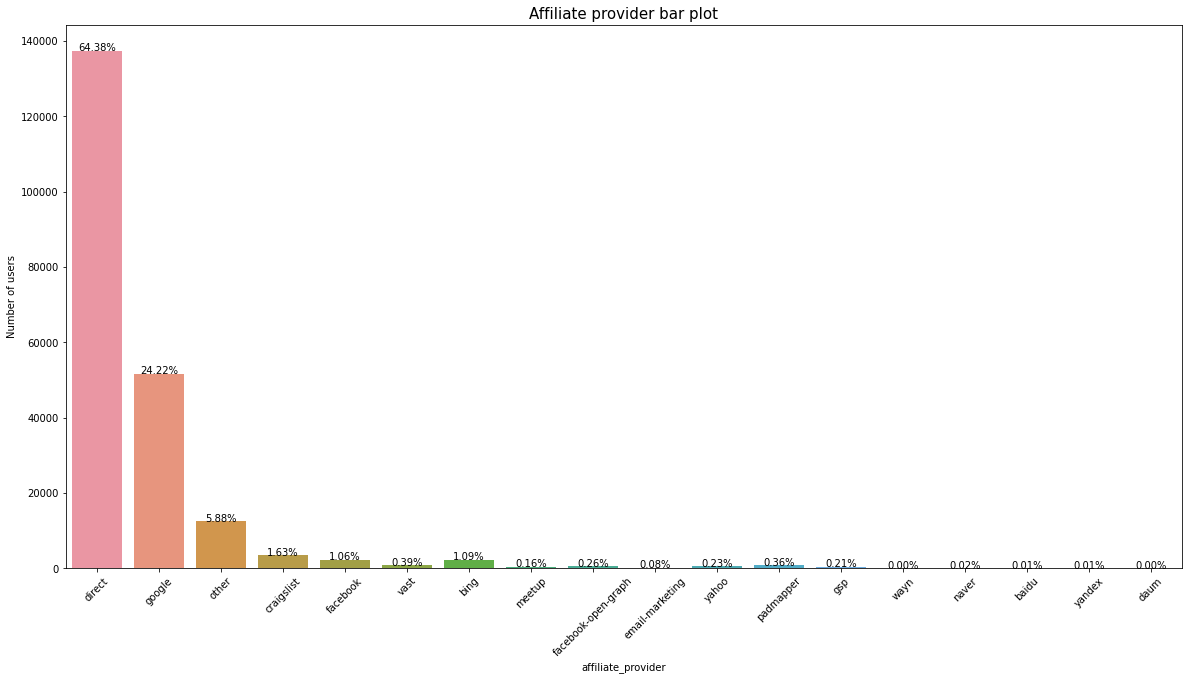

In [253]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df_train['affiliate_provider'])
plt.ylabel('Number of users')
plt.title('Affiliate provider bar plot',fontsize=15)
plt.xticks(rotation=45)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Comments-
>- Most of the users use direct as their affiliate provider, followed by google, others and so on.

**Percentage for first browser used by users**

In [254]:
print("Percetage distribution for first browser used:")
print("--"*50)
x=dict(round(df_train.first_browser.value_counts()/len(df_train)*100,4))
for i,j in x.items():
    print(i,"---",j,"%") 

Percetage distribution for first browser used:
----------------------------------------------------------------------------------------------------
Chrome --- 29.9108 %
Safari --- 21.1613 %
Firefox --- 15.7671 %
-unknown- --- 12.7739 %
IE --- 9.8702 %
Mobile Safari --- 9.0297 %
Chrome Mobile --- 0.595 %
Android Browser --- 0.3987 %
AOL Explorer --- 0.1148 %
Opera --- 0.0881 %
Silk --- 0.0581 %
Chromium --- 0.0342 %
BlackBerry Browser --- 0.0248 %
Maxthon --- 0.0216 %
IE Mobile --- 0.0169 %
Apple Mail --- 0.0169 %
Sogou Explorer --- 0.0155 %
Mobile Firefox --- 0.0141 %
SiteKiosk --- 0.0112 %
RockMelt --- 0.0112 %
Iron --- 0.008 %
IceWeasel --- 0.0061 %
Pale Moon --- 0.0056 %
SeaMonkey --- 0.0052 %
CometBird --- 0.0052 %
Yandex.Browser --- 0.0052 %
Camino --- 0.0042 %
TenFourFox --- 0.0037 %
CoolNovo --- 0.0028 %
wOSBrowser --- 0.0028 %
Avant Browser --- 0.0019 %
Opera Mini --- 0.0019 %
Mozilla --- 0.0014 %
TheWorld Browser --- 0.0009 %
Flock --- 0.0009 %
Comodo Dragon --- 0.0009 %
OmniW

Comments-
>- Some of the most popular browsers used are Chrome, safari, firefox and so on.

### Bivariate analysis:

**Plot for users signup apps vs countries**

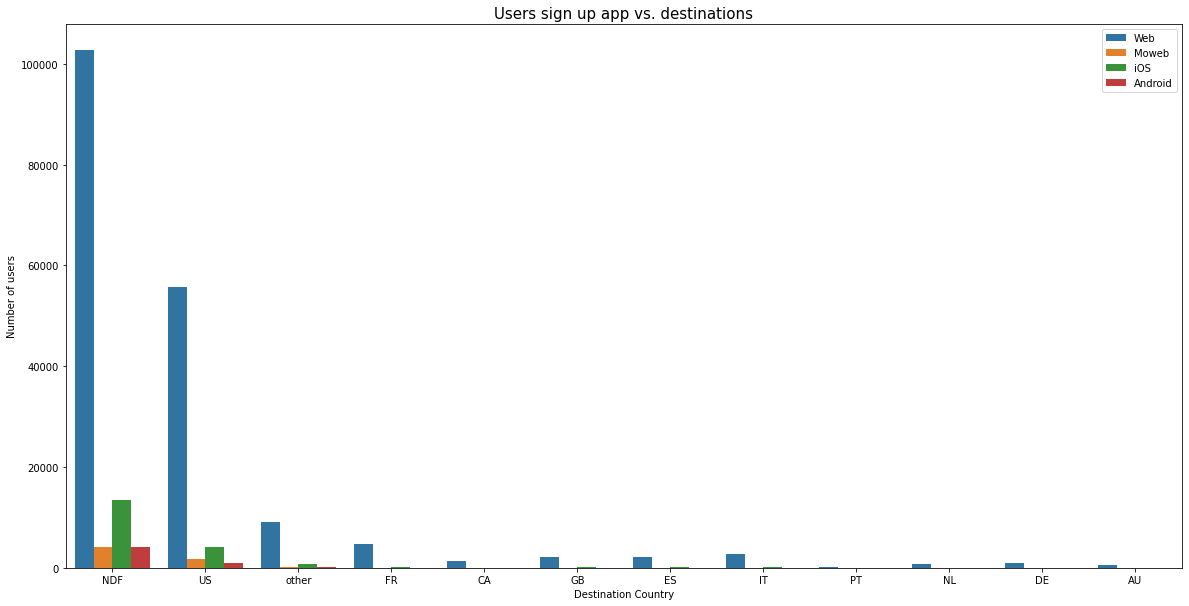

In [261]:
plt.figure(figsize=(20,10))
sns.countplot(x='country_destination', data = df_train, hue = 'signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up app vs. destinations',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comments-
>- From the graph itself, we can very well make out that most used signup app is Web followed by iOS. Though the graph is diffcult to interpret, yet we might conclude that preference of the signup apps doesn't help much in deciding the first booking destination.

**Plot for signup method**

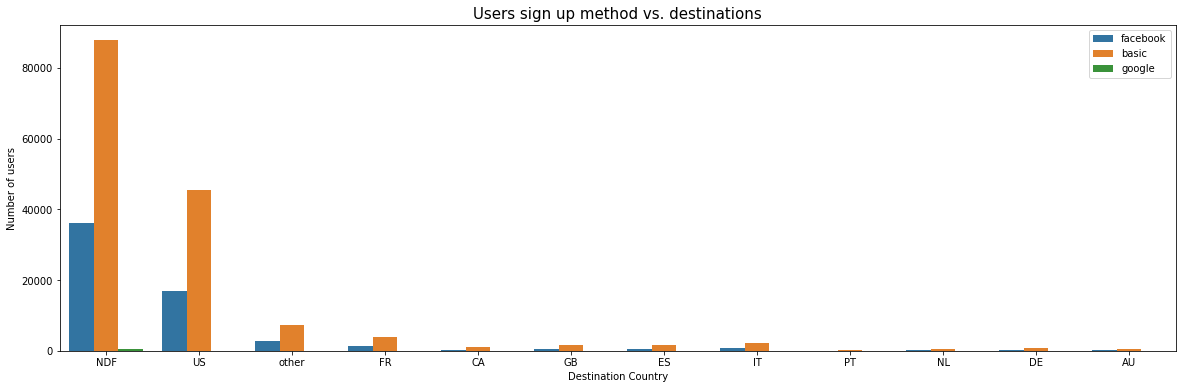

In [262]:
plt.figure(figsize=(20,6))
sns.countplot(x='country_destination', data = df_train, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destinations',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comments-
>- Basic is the most common signup method followed by users and there is not much difference in the preference of the signup method country-wise.

**Plot for first device type**

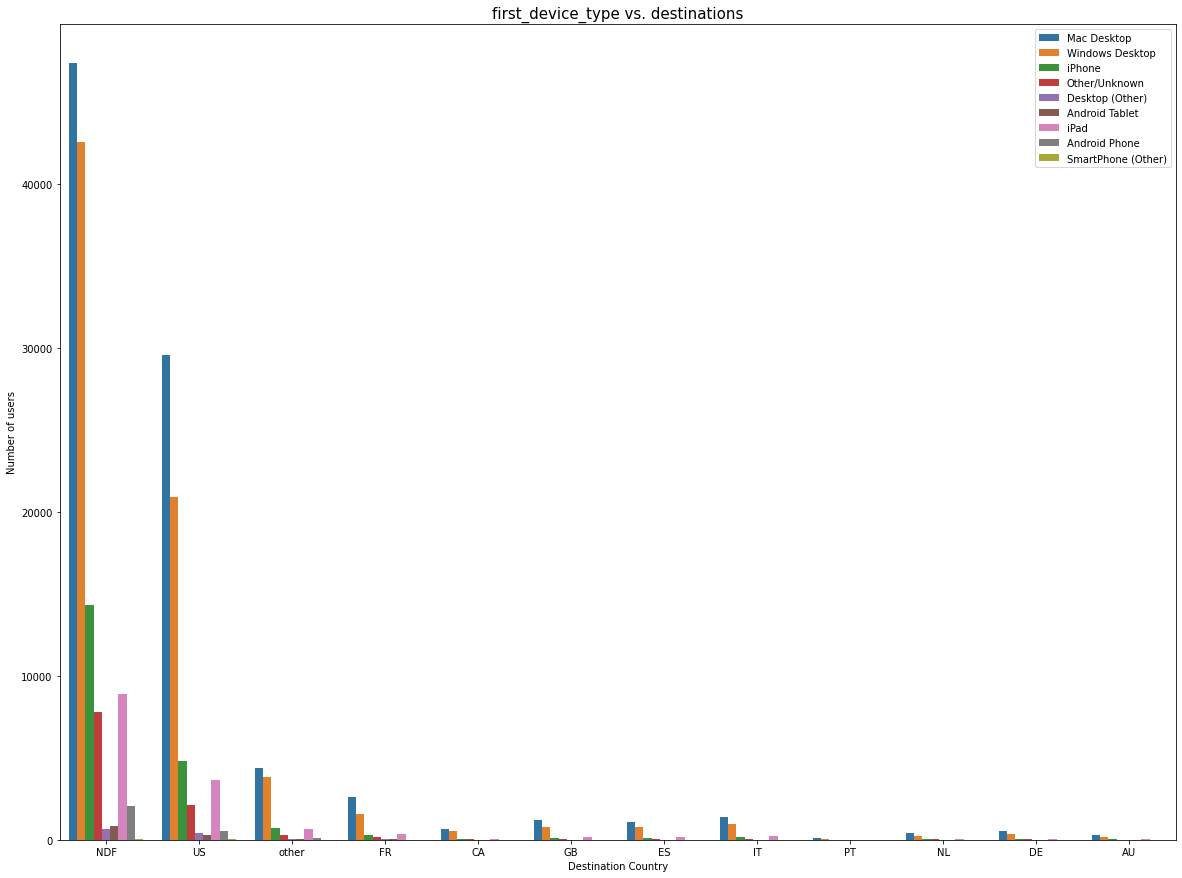

In [263]:
plt.figure(figsize=(20,15))
sns.countplot(x='country_destination', data = df_train, hue = 'first_device_type')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('first_device_type vs. destinations',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comments-
>- The most popular devices used by the users are Mac desktop and window desktop. Some considerable amount of users uses iPhone, iPad and others for accesing or booking through Airbnb accounts. We don't see much difference in the preference of the users country-wise.

**Plot for Dates of account creation**

In [116]:
#converting the string date type into readable datetime format
df_train.date_account_created=df_train.date_account_created.apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))

In [36]:
#for test dataset
df_test.date_account_created=df_test.date_account_created.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

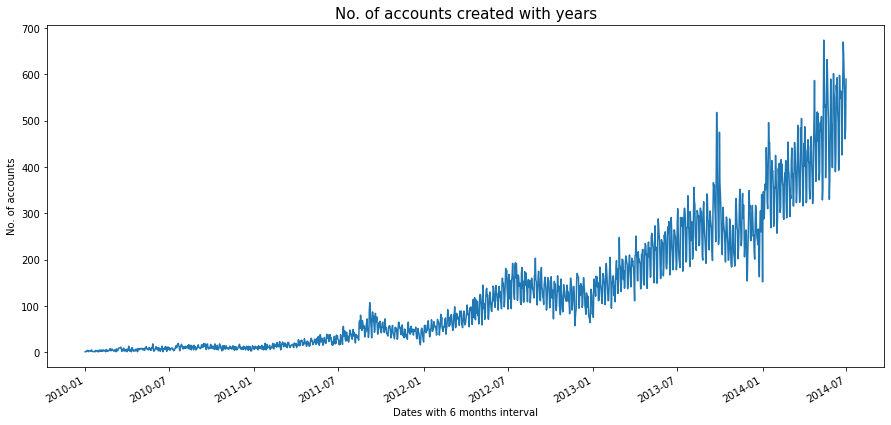

In [37]:
plt.figure(figsize=(15,7))
df_train.date_account_created.value_counts().plot(kind='line')
plt.title("No. of accounts created with years",fontsize=15)
plt.xlabel("Dates with 6 months interval")
plt.ylabel("No. of accounts")
plt.show()

Comments-
>- We see that there is an upward trend in the number of Airbnb accounts with years. 
>- There is some seasonal peaks and some sudden peaks like 9th, 10th months of 2011 or 9th, 10th months of 2013 and sudden downfalls like 1st month of 2014.
>- But there is a sudden rise in the no. of accounts after the year 2014.

In [266]:
#getting the data where first booking is made,ie, users who have made their first booking
df_booking_done=df_train[df_train.country_destination!='NDF']

**Plot for dates account creation where bookings are made**

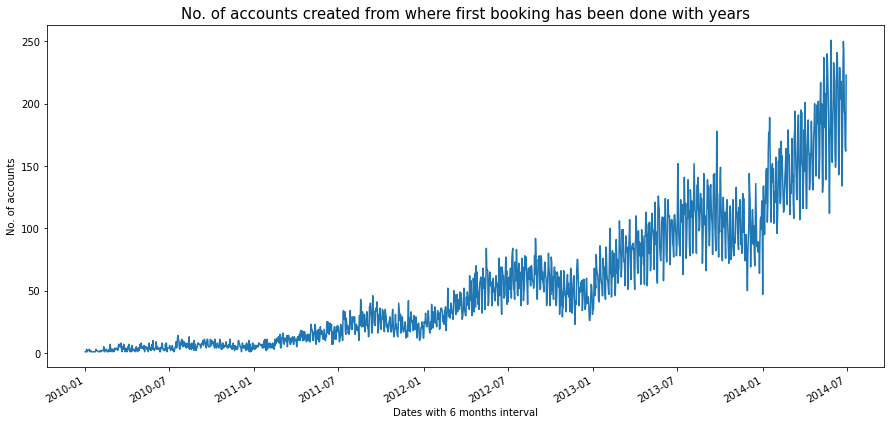

In [267]:
plt.figure(figsize=(15,7))
df_booking_done.date_account_created.value_counts().plot(kind='line')
plt.title("No. of accounts created from where first booking has been done with years",fontsize=15)
plt.xlabel("Dates with 6 months interval")
plt.ylabel("No. of accounts")
plt.show()

Comments- 
>- Here also we see an upward trend in the no. of bookings made with year which is actually good and we might conclude that Airbnb is in the right direction to grow their business.

In [117]:
#extraing the month and weekday and week day to see if any month or week day is given any preference or not by the users.
df_train['month']=df_train.date_account_created.apply(lambda x: x.month)
df_train['weekday']=df_train.date_account_created.apply(lambda x: x.weekday())

In [39]:
#for test dataset
df_test['month']=df_test.date_account_created.apply(lambda x: x.month)
df_test['weekday']=df_test.date_account_created.apply(lambda x: x.weekday())

In [269]:
#separting the users where first booking is done vs no booking is done
df_booking_done=df_train[df_train.country_destination!='NDF']
df_NDF=df_train[df_train.country_destination=='NDF']

**Plot for month**

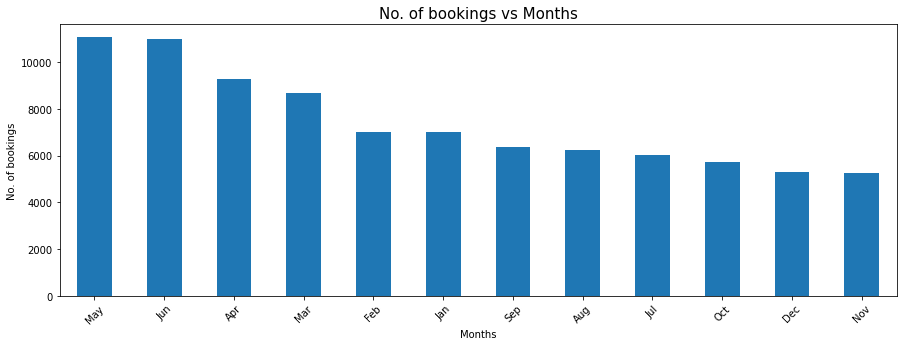

In [270]:
plt.figure(figsize=(15,5))
df_booking_done.month.value_counts().plot(kind='bar')
plt.xticks([6-1,5-1,4-1,3-1,1-1,2-1,9-1,8-1,7-1,10-1,12-1,11-1],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.xlabel("Months")
plt.ylabel("No. of bookings")
plt.title("No. of bookings vs Months",fontsize=15)
plt.show()

Comments-
>- We see most of the bookings are done in the months of May, June, April, March. Lesser number of bookings are done in December or November. This can be a reason that most users get busy with christmas and new year celebrations rather than visiting any place.
>- So we might conclude that summer and monsoon months are the peak months for bookings.

**Plot for weekday**

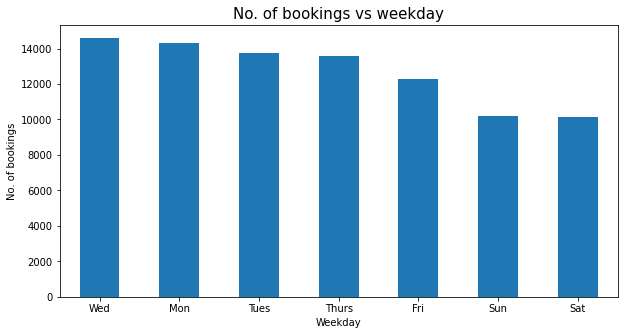

In [271]:
plt.figure(figsize=(10,5))
df_booking_done.weekday.value_counts().plot(kind='bar')
plt.xticks([1,2,0,3,4,6,5],["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],rotation=0)
plt.xlabel("Weekday")
plt.ylabel("No. of bookings")
plt.title("No. of bookings vs weekday",fontsize=15)
plt.show()

Comments-
>- We see more no. of bookings are done in weekdays and lesser in weekends. May be users might have gone out already in weekends .

**Plot for weekday vs destination**

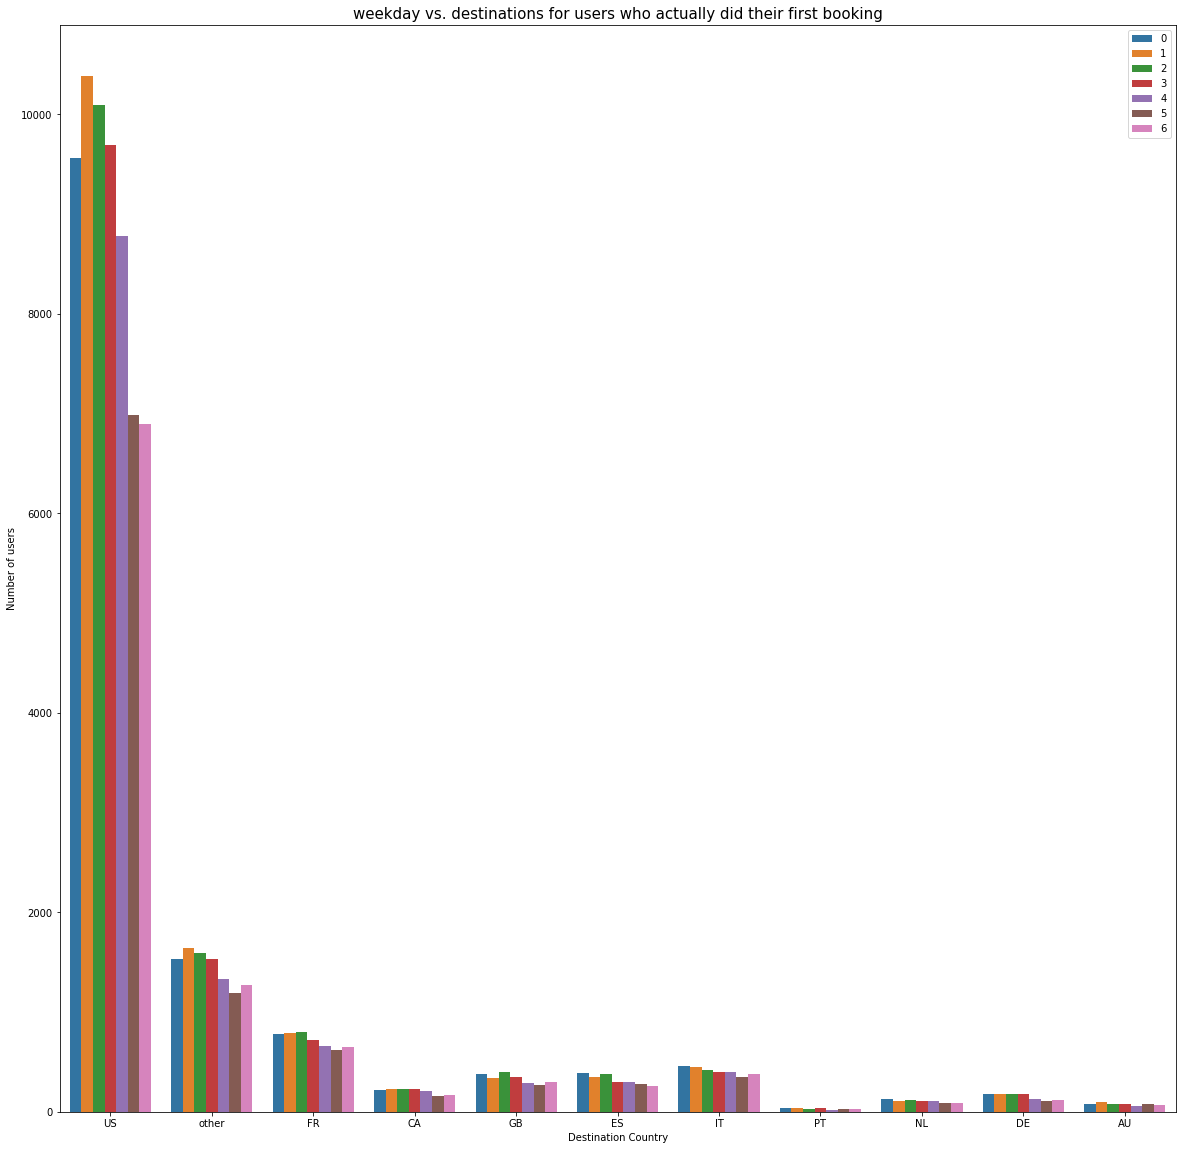

In [272]:
plt.figure(figsize=(20,20))
sns.countplot(x='country_destination', data = df_booking_done, hue = 'weekday')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('weekday vs. destinations for users who actually did their first booking',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Comments-
>- If we compare the weekdays destination booking wise, we see not much difference in the pattern per destination. Lesser bookings happend in weekends because people might have already gone out or so.

**Getting the duration of days between first active timestamp and account created date to know how eager an user was to open and Airbnb account and do some booking**

In [68]:
df_train.timestamp_first_active[0]

20090300000000.0

In [118]:
#converting the timestamp into datetime format
df_train['date_first_active']=df_train.timestamp_first_active.apply(lambda x: datetime.strptime(str(int(x))[:6],'%Y%m'))

In [42]:
#for test dataset
df_test['date_first_active']=df_test.timestamp_first_active.apply(lambda x: datetime.strptime(str(int(x))[:6],'%Y%m'))

In [143]:
df_train.date_first_active[0]

Timestamp('2009-03-01 00:00:00')

In [144]:
df_train.date_account_created[0]

Timestamp('2010-06-28 00:00:00')

In [145]:
(df_train.date_account_created[0]-df_train.date_first_active[0]).components.days

484

In [119]:
#getting the no. of waiting days
for i,data in df_train.iterrows():
    df_train.at[i,'waiting_days']=(data['date_account_created']-data['date_first_active']).components.days

In [44]:
#for test dataset
for i,data in df_test.iterrows():
    df_test.at[i,'waiting_days']=(data['date_account_created']-data['date_first_active']).components.days

In [277]:
#separting the users where first booking is done vs no booking is done
df_booking_done=df_train[df_train.country_destination!='NDF']
df_NDF=df_train[df_train.country_destination=='NDF']

**Plot for waiting days**

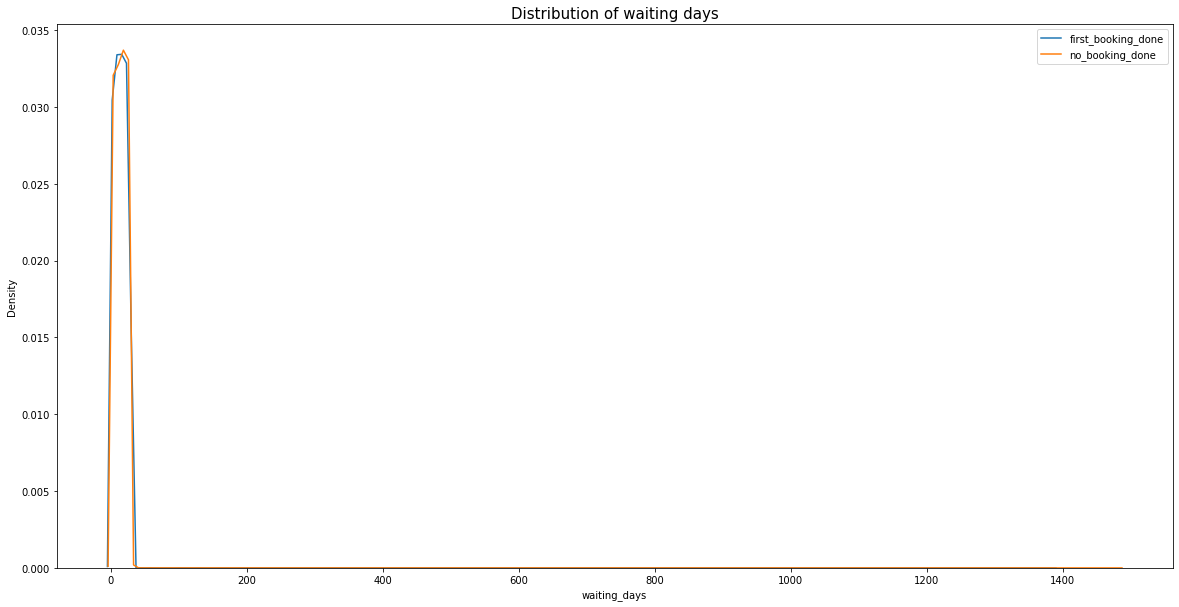

In [278]:
plt.figure(figsize=(20,10))
sns.distplot(df_booking_done.waiting_days,hist=False,label='first_booking_done')
sns.distplot(df_NDF.waiting_days,hist=False,label='no_booking_done')
plt.title("Distribution of waiting days",fontsize=15)
plt.legend()
plt.show()

In [279]:
df_booking_done.waiting_days.describe()

count    88908.000000
mean        15.108787
std         16.109575
min          0.000000
25%          7.000000
50%         15.000000
75%         22.000000
max       1385.000000
Name: waiting_days, dtype: float64

In [280]:
df_NDF.waiting_days.describe()

count    124543.000000
mean         15.095252
std          13.800991
min           0.000000
25%           7.000000
50%          15.000000
75%          22.000000
max        1483.000000
Name: waiting_days, dtype: float64

Comments-
>- Since Both the graphs are very much overlapping there is no significant difference in the waiting time of the users who did their first booking versus the users who are yet to do their first booking.
>- The summary statistics also shows not much difference is there between the two types of users.

**Violin-plot for waiting days**

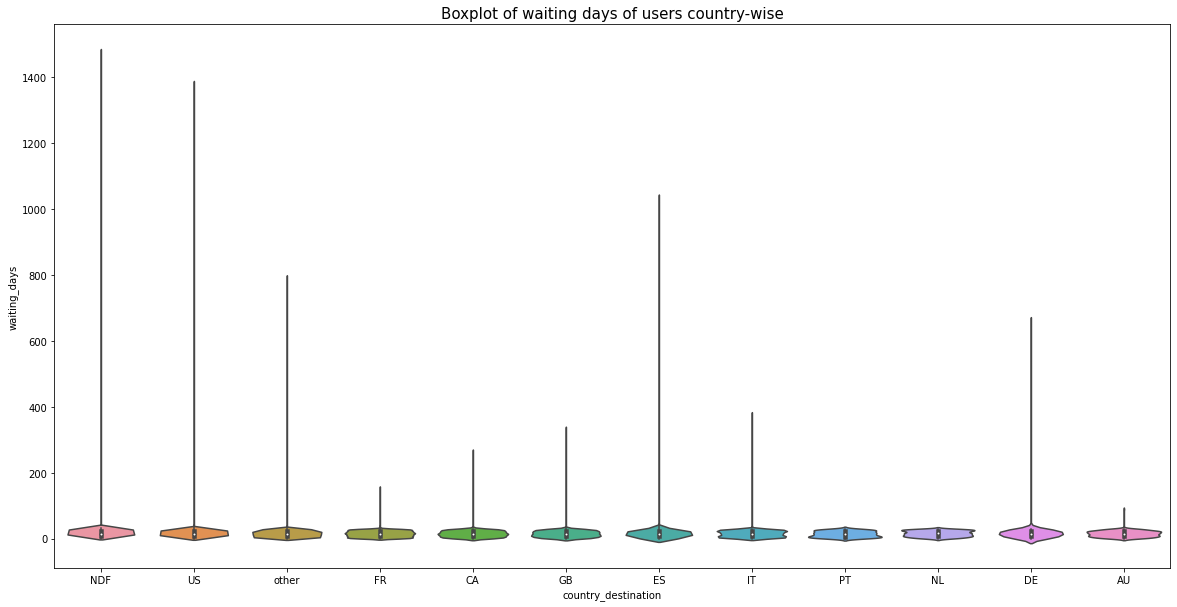

In [167]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df_train.country_destination,y=df_train.waiting_days)
plt.title("Boxplot of waiting days of users country-wise",fontsize=15)

plt.show()

Comments-
>- As we see that the box-plots for waiting time feature for various destination countries is also kinda similar, but the range of waitings days is considerably lesser for contries like France, Canada, Great Britain, Italy, Portugal, Netherlands and Australia than the destination countries like US, Spain, Germany where the range of waiting days is more. So this feature is somewhat useful.
>- There can be outliers in this feature for NDF, US or Spain but since for some countries the range is considerably low, we chose not to remove the outliers since we might loose the range info country-wise that we have.

In [120]:
#extraing the month and weekday and week day to see if any month or week day is given any preference or not by the users.
df_train['1st_active_month']=df_train.date_first_active.apply(lambda x: x.month)
df_train['1st_active_weekday']=df_train.date_first_active.apply(lambda x: x.weekday())

In [47]:
#for test dataset
df_test['1st_active_month']=df_test.date_first_active.apply(lambda x: x.month)
df_test['1st_active_weekday']=df_test.date_first_active.apply(lambda x: x.weekday())

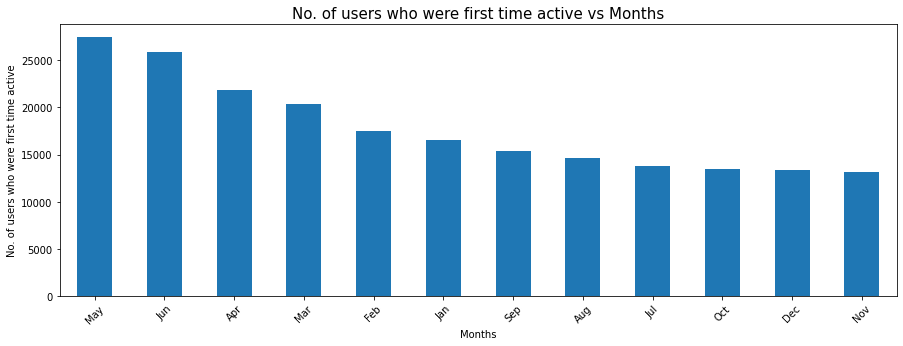

In [283]:
plt.figure(figsize=(15,5))
df_train['1st_active_month'].value_counts().plot(kind='bar')
plt.xticks([6-1,5-1,4-1,3-1,1-1,2-1,9-1,8-1,7-1,10-1,12-1,11-1],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.xlabel("Months")
plt.ylabel("No. of users who were first time active")
plt.title("No. of users who were first time active vs Months",fontsize=15)
plt.show()

Comments-
>- As we saw earlier, March, April, May, June are the peak months where mostly users tend to search about Airbnb or open accounts and On the other hand Dec, Nov are the months where least no. of users are found in the Airbnb website for the first time.

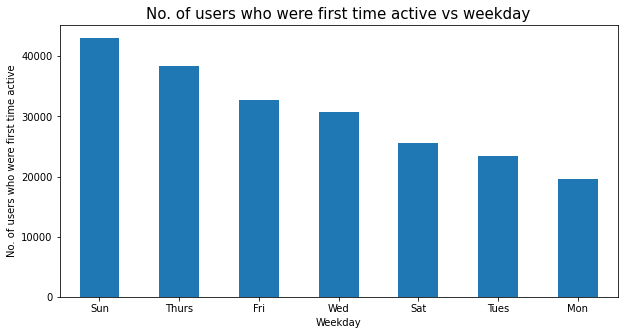

In [284]:
plt.figure(figsize=(10,5))
df_train['1st_active_weekday'].value_counts().plot(kind='bar')
plt.xticks([6,5,3,1,2,4,0],["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],rotation=0)
plt.xlabel("Weekday")
plt.ylabel("No. of users who were first time active")
plt.title("No. of users who were first time active vs weekday",fontsize=15)
plt.show()

Comment-
>- To our surprise, we notice that first time users search about Airbnb mostly on sundays. It might happen that users who are at home in sundays, tend to browse more.

In [121]:
df_train

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,month,weekday,date_first_active,waiting_days,1st_active_month,1st_active_weekday
0,gxn3p5htnn,2010-06-28,2.009030e+13,FEMALE,41.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,NDF,6,0,2009-03-01,484.0,3,6
1,820tgsjxq7,2011-05-25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,NDF,5,2,2009-05-01,754.0,5,4
2,4ft3gnwmtx,2010-09-28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,US,9,1,2009-06-01,484.0,6,0
3,bjjt8pjhuk,2011-12-05,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,other,12,0,2009-10-01,795.0,10,3
4,87mebub9p4,2010-09-14,2.009120e+13,MALE,41.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,US,9,1,2009-12-01,287.0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,...,Web,Mac Desktop,Safari,NDF,6,0,2014-06-01,29.0,6,6
213447,mhewnxesx9,2014-06-30,2.014060e+13,MALE,41.0,basic,0,en,direct,direct,...,Web,Windows Desktop,Chrome,NDF,6,0,2014-06-01,29.0,6,6
213448,6o3arsjbb4,2014-06-30,2.014060e+13,FEMALE,32.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Firefox,NDF,6,0,2014-06-01,29.0,6,6
213449,jh95kwisub,2014-06-30,2.014060e+13,MALE,29.0,basic,25,en,other,other,...,iOS,iPhone,Mobile Safari,NDF,6,0,2014-06-01,29.0,6,6


In [170]:
#saving the clean train data
df_train.to_csv("train_cleaned_data.csv",index=False)

In [49]:
#saving the clean test data
df_test.to_csv("test_cleaned_data.csv",index=False)

In [4]:
####################remove it

df_train=pd.read_csv("train_cleaned_data.csv")

df_test=pd.read_csv("test_cleaned_data.csv")

# Analysis on Session data

In [5]:
#session data

df_ses=pd.read_csv("sessions.csv")
print("shape of session dataset",df_ses.shape)
print("--"*50)
df_ses.head()

shape of session dataset (10567737, 6)
----------------------------------------------------------------------------------------------------


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [85]:
print("There are",len(df_ses.user_id.unique()),"unique users in the session data.")

There are 135484 unique users in the session data.


In [51]:
for i,j in dict(df_ses.action.value_counts()).items():    #action info
    print(i,"---",j) 

show --- 2768278
index --- 843699
search_results --- 725226
personalize --- 706824
search --- 536057
ajax_refresh_subtotal --- 487744
update --- 365130
similar_listings --- 364624
social_connections --- 339000
reviews --- 320591
active --- 188036
similar_listings_v2 --- 168788
lookup --- 162041
create --- 155887
dashboard --- 152952
header_userpic --- 141830
collections --- 124417
edit --- 109083
campaigns --- 105028
track_page_view --- 81117
unavailabilities --- 78317
qt2 --- 64651
notifications --- 59392
confirm_email --- 58726
requested --- 57034
identity --- 53631
ajax_check_dates --- 52517
show_personalize --- 50434
ask_question --- 44063
listings --- 43656
authenticate --- 42930
calendar_tab_inner2 --- 42198
travel_plans_current --- 38195
edit_verification --- 33434
ajax_lwlb_contact --- 33413
other_hosting_reviews_first --- 31045
recommendations --- 30592
impressions --- 27787
manage_listing --- 26618
click --- 25571
complete_status --- 24674
ajax_photo_widget_form_iframe --- 24

In [116]:
df_ses.action_type.value_counts()  #action type info

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [117]:
for i,j in dict(df_ses.action_detail.value_counts()).items():    #action detail info
    print(i,'---',j)

view_search_results --- 1776885
p3 --- 1376550
-unknown- --- 1031141
wishlist_content_update --- 706824
user_profile --- 656839
change_trip_characteristics --- 487744
similar_listings --- 364624
user_social_connections --- 336799
update_listing --- 269779
listing_reviews --- 269021
dashboard --- 152952
user_wishlists --- 152672
header_userpic --- 141830
message_thread --- 132395
edit_profile --- 108686
message_post --- 87103
contact_host --- 81041
unavailable_dates --- 77795
confirm_email_link --- 58422
create_user --- 54878
change_contact_host_dates --- 52517
user_profile_content_update --- 50434
user_reviews --- 49665
p5 --- 48167
login --- 38378
your_trips --- 38195
p1 --- 37976
notifications --- 37355
profile_verifications --- 33434
reservations --- 32481
user_listings --- 31971
your_listings --- 30980
listing_recommendations --- 30215
update_user --- 29008
create_phone_numbers --- 28336
p4 --- 28030
update_listing_description --- 26980
update_user_profile --- 26689
manage_listing 

In [118]:
df_ses.device_type.value_counts()     #device type info

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

Comments-
>- Thus we see that there are multiple rows for a single user, ie, each row corresponds to a particular action done by a user. So thus if a user performs multiple actions, then there will be multiple rows.
>- We have to come up with ways to get this dataset arranged in rows which correponds to an unique user such that this can be merged with the train dataset for modelling.

**Checking for null values and treating them with suitable means.**

In [6]:
#checking for null values
df_ses.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [7]:
#dropping the rows with null user ids

df_ses.dropna(subset=['user_id'],inplace=True)
print("Shape of session data after removing nan values for user_id is",df_ses.shape)

Shape of session data after removing nan values for user_id is (10533241, 6)


In [8]:
print("There are in total",len(df_ses.action.unique())," action values")  #here nan is also counted as a category
print("There are in total",len(df_ses.action_type.unique())," action type values")
print("There are in total",len(df_ses.action_detail.unique())," action detail values")
print("There are in total",len(df_ses.device_type.unique())," device type values")

There are in total 360  action values
There are in total 11  action type values
There are in total 156  action detail values
There are in total 14  device type values


# Approach-1

In [ ]:
##################################################################################################################

In [9]:
#filling the null values with empty strings for categorical varaibles
df_ses.action.fillna('NULL',inplace=True)
df_ses.action_type.fillna('NULL',inplace=True)
df_ses.action_detail.fillna('NULL',inplace=True)

#filling the null values with 0.0
df_ses.secs_elapsed.fillna(0.0,inplace=True)

In [21]:
#merging the columns action, action_type and action_detail into a single column 'action_row'
for i,data in tqdm(df_ses.iterrows()):
    df_ses.at[i,'action_row']=data['action']+" "+data['action_type']+" "+data['action_detail']
df_ses.head(10)

10533241it [19:09, 9166.18it/s]


,user_id,action,action_type,action_detail,device_type,secs_elapsed,action_row
0,d1mm9tcy42,lookup,NULL,NULL,Windows Desktop,319.0,lookup NULL NULL
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,search_results click view_search_results
2,d1mm9tcy42,lookup,NULL,NULL,Windows Desktop,301.0,lookup NULL NULL
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,search_results click view_search_results
4,d1mm9tcy42,lookup,NULL,NULL,Windows Desktop,435.0,lookup NULL NULL
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0,search_results click view_search_results
6,d1mm9tcy42,lookup,NULL,NULL,Windows Desktop,115.0,lookup NULL NULL
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0,personalize data wishlist_content_update
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0,index view view_search_results
9,d1mm9tcy42,lookup,NULL,NULL,Windows Desktop,683.0,lookup NULL NULL


In [177]:
print("The different types of action an user can perform:",len(df_ses.action_row.value_counts()))

The different types of action an user can perform: 457


**Groupby functions to get a single row for each user**

In [22]:
#getting the action that is performed max times per user
action_row2=df_ses[['user_id','action_row']].groupby(['user_id']).max().reset_index()

#getting the most used device type per user
device_type2=df_ses[['user_id','device_type']].groupby(['user_id']).max().reset_index()

#getting the mean of secs elapsed per user
#secs_elapsed2=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).mean().reset_index()

In [18]:
###########################  feature engineering

count_action=df_ses[['user_id','action']].groupby(['user_id']).count().reset_index().rename(columns={'action':'count_action'})

unique_action=df_ses[['user_id','action']].groupby(['user_id']).nunique().reset_index().rename(columns={'action':'unique_action'})
unique_action_type=df_ses[['user_id','action_type']].groupby(['user_id']).nunique().reset_index().rename(columns={'action_type':'unique_action_type'})
unique_action_detail=df_ses[['user_id','action_detail']].groupby(['user_id']).nunique().reset_index().rename(columns={'action_detail':'unique_action_detail'})
unique_device=df_ses[['user_id','device_type']].groupby(['user_id']).nunique().reset_index().rename(columns={'device_type':'unique_device'})

secs_elapsed_sum=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).sum().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_sum'})
secs_elapsed_mean=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).mean().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_mean'})
#secs_elapsed_min=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).min().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_min'})
secs_elapsed_max=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).max().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_max'})
secs_elapsed_std=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).std().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_std'})
secs_elapsed_median=df_ses[['user_id','secs_elapsed']].groupby(['user_id']).median().reset_index().rename(columns={'secs_elapsed':'secs_elapsed_median'})

In [19]:
df_ses2=pd.merge(count_action,unique_action,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,unique_action_type,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,unique_action_detail,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,unique_device,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,secs_elapsed_sum,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,secs_elapsed_mean,how='inner',on='user_id')
#df_ses2=pd.merge(df_ses2,secs_elapsed_min,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,secs_elapsed_max,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,secs_elapsed_std,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,secs_elapsed_median,how='inner',on='user_id')


df_ses2

,user_id,count_action,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median
0,00023iyk9l,40,14,7,14,2,867896.0,21697.400000,0.0,567165.0,91120.246977,843.0
1,0010k6l0om,63,11,6,9,1,586543.0,9310.206349,0.0,127898.0,22598.457942,847.0
2,001wyh0pz8,90,10,6,10,1,282965.0,3144.055556,0.0,50548.0,6541.226692,1104.0
3,0028jgx1x1,31,5,5,6,2,297010.0,9580.967742,0.0,84636.0,17791.419521,489.0
4,002qnbzfs5,789,26,8,23,2,6487080.0,8221.901141,0.0,1418284.0,58074.501758,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135478,zzxox7jnrx,89,28,7,19,1,639436.0,7184.674157,0.0,98479.0,14591.191310,857.0
135479,zzy7t0y9cm,8,7,5,7,1,73771.0,9221.375000,0.0,42612.0,16063.916939,680.5
135480,zzysuoqg6x,3,3,3,3,1,1731.0,577.000000,0.0,1533.0,833.818326,198.0
135481,zzywmcn0jv,51,13,7,12,1,2149949.0,42155.862745,0.0,525635.0,120910.363616,2310.0


In [24]:
#getting the final session data
df_ses2=pd.merge(action_row2,df_ses2,how='inner',on='user_id')
df_ses2=pd.merge(df_ses2,device_type2,how='inner',on='user_id')

df_ses2

,user_id,action_row,count_action,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,00023iyk9l,travel_plans_current view your_trips,40,14,7,14,2,867896.0,21697.400000,567165.0,91120.246977,843.0,iPhone
1,0010k6l0om,similar_listings_v2 NULL NULL,63,11,6,9,1,586543.0,9310.206349,127898.0,22598.457942,847.0,Mac Desktop
2,001wyh0pz8,update submit update_user,90,10,6,10,1,282965.0,3144.055556,50548.0,6541.226692,1104.0,Android App Unknown Phone/Tablet
3,0028jgx1x1,show view user_profile,31,5,5,6,2,297010.0,9580.967742,84636.0,17791.419521,489.0,Android Phone
4,002qnbzfs5,update submit update_user,789,26,8,23,2,6487080.0,8221.901141,1418284.0,58074.501758,498.0,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135478,zzxox7jnrx,verify -unknown- -unknown-,89,28,7,19,1,639436.0,7184.674157,98479.0,14591.191310,857.0,Windows Desktop
135479,zzy7t0y9cm,show NULL NULL,8,7,5,7,1,73771.0,9221.375000,42612.0,16063.916939,680.5,Windows Desktop
135480,zzysuoqg6x,hosting_social_proof -unknown- -unknown-,3,3,3,3,1,1731.0,577.000000,1533.0,833.818326,198.0,Windows Desktop
135481,zzywmcn0jv,similar_listings data similar_listings,51,13,7,12,1,2149949.0,42155.862745,525635.0,120910.363616,2310.0,Windows Desktop


In [192]:
print("No. of different types of categories a user can perform:",len(df_ses2.action_row.value_counts()))

No. of different types of categories a user can perform: 216


In [27]:
df_ses2.isna().sum()

user_id                 0
action_row              0
count_action            0
unique_action           0
unique_action_type      0
unique_action_detail    0
unique_device           0
secs_elapsed_sum        0
secs_elapsed_mean       0
secs_elapsed_max        0
secs_elapsed_std        0
secs_elapsed_median     0
device_type             0
dtype: int64

In [26]:
m=df_ses2.secs_elapsed_std.median()
df_ses2.secs_elapsed_std.fillna(m,inplace=True)

In [28]:
#renaming the user_id to id in session data
df_ses2.rename(columns={'user_id':'id'},inplace=True)

In [29]:
print("% of users in session data who are there in train data:",round(len(pd.merge(df_ses2,df_train,how='inner',on='id'))/len(df_train)*100,4),"%")

% of users in session data who are there in train data: 34.5817 %


**Merging the train and session data using left outer join**

In [30]:
df2=pd.merge(df_train,df_ses2,how='left',on='id')
df2.head(10)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,gxn3p5htnn,2010-06-28,2.009030e+13,FEMALE,28.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,2.009120e+13,FEMALE,41.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,osr2jwljor,2010-01-01,2.010010e+13,MALE,42.0,basic,0,en,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,lsw9q7uk0j,2010-01-02,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0d01nltbrs,2010-01-03,2.010010e+13,FEMALE,47.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,a1vcnhxeij,2010-01-04,2.010010e+13,FEMALE,50.0,basic,0,en,other,craigslist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6uh8zyj2gn,2010-01-04,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df2.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
month                           0
weekday                         0
date_first_active               0
waiting_days                    0
1st_active_month                0
1st_active_weekday              0
action_row                 139636
count_action               139636
unique_action              139636
unique_action_type         139636
unique_action_detail       139636
unique_device              139636
secs_elapsed_sum           139636
secs_elapsed_mean          139636
secs_elapsed_m

In [33]:
print("% of null values in for a particular feature which has null values: ",round(df2.action_row.isna().sum()/len(df2)*100,4),"%")


% of null values in for a particular feature which has null values:  65.4183 %


In [34]:
top_10_actions=[]
no_of_actions=[]
c=1
for i,j in dict(df2.action_row.value_counts()).items():
    print(i,"<--->",round(j/len(df2)*100,4),"%")
    if c<=10:
        top_10_actions.append(i)
        no_of_actions.append(j)
    c+=1

update submit update_listing <---> 6.1593 %
verify -unknown- -unknown- <---> 5.9812 %
similar_listings data similar_listings <---> 5.7554 %
update submit update_user <---> 3.1614 %
header_userpic data header_userpic <---> 1.5367 %
unavailabilities data unavailable_dates <---> 1.2715 %
travel_plans_current view your_trips <---> 0.848 %
show -unknown- -unknown- <---> 0.7875 %
update submit update_user_profile <---> 0.7772 %
social_connections data user_social_connections <---> 0.6517 %
update submit update_listing_description <---> 0.5814 %
show view p3 <---> 0.5388 %
show_personalize data user_profile_content_update <---> 0.3757 %
track_page_view NULL NULL <---> 0.3607 %
search_results click view_search_results <---> 0.3575 %
recommended_listings -unknown- -unknown- <---> 0.3425 %
update -unknown- -unknown- <---> 0.3153 %
show view p1 <---> 0.3134 %
show NULL NULL <---> 0.2933 %
similar_listings_v2 NULL NULL <---> 0.2399 %
create submit signup <---> 0.2357 %
this_hosting_reviews click l

In [41]:
for i in range(10):
    print("Number of users:",no_of_actions[i],"-----------Action:",top_10_actions[i])

Number of users: 13147 -----------Action: update submit update_listing
Number of users: 12767 -----------Action: verify -unknown- -unknown-
Number of users: 12285 -----------Action: similar_listings data similar_listings
Number of users: 6748 -----------Action: update submit update_user
Number of users: 3280 -----------Action: header_userpic data header_userpic
Number of users: 2714 -----------Action: unavailabilities data unavailable_dates
Number of users: 1810 -----------Action: travel_plans_current view your_trips
Number of users: 1681 -----------Action: show -unknown- -unknown-
Number of users: 1659 -----------Action: update submit update_user_profile
Number of users: 1391 -----------Action: social_connections data user_social_connections


In [36]:
prop=[i/sum(no_of_actions) for i in no_of_actions]
prop

[0.22871507602379876,
 0.22210431091472113,
 0.21371907727636477,
 0.11739327093698897,
 0.05706134094151213,
 0.047214780279043876,
 0.031488118019553944,
 0.029243937232524966,
 0.028861208726209946,
 0.024198879649281513]

In [37]:
#filling the null values for action using top 10 actions keeping the proportion same of top 10 actions
for i,data in tqdm(df2.iterrows()):
    if type(data['action_row'])!=str:
        a=np.random.uniform()
        if a<prop[0]:
            df2.at[i,'action_row']=top_10_actions[0]
        elif a<sum(prop[:2]):
            df2.at[i,'action_row']=top_10_actions[1]
        elif a<sum(prop[:3]):
            df2.at[i,'action_row']=top_10_actions[2]
        elif a<sum(prop[:4]):
            df2.at[i,'action_row']=top_10_actions[3]
        elif a<sum(prop[:5]):
            df2.at[i,'action_row']=top_10_actions[4]
        elif a<sum(prop[:6]):
            df2.at[i,'action_row']=top_10_actions[5]
        elif a<sum(prop[:7]):
            df2.at[i,'action_row']=top_10_actions[6]
        elif a<sum(prop[:8]):
            df2.at[i,'action_row']=top_10_actions[7]
        elif a<sum(prop[:9]):
            df2.at[i,'action_row']=top_10_actions[8]
        else:
            df2.at[i,'action_row']=top_10_actions[9]
            

213451it [00:20, 10279.37it/s]


In [38]:
for i,j in dict(df2.device_type.value_counts()).items():
    print(i,"<--->",round(j/len(df2)*100,4),"%")

Mac Desktop <---> 10.9149 %
Windows Desktop <---> 10.163 %
iPhone <---> 7.5184 %
iPad Tablet <---> 2.5125 %
Android App Unknown Phone/Tablet <---> 1.1239 %
-unknown- <---> 0.9796 %
Android Phone <---> 0.8353 %
Tablet <---> 0.2867 %
Linux Desktop <---> 0.112 %
Chromebook <---> 0.0909 %
Windows Phone <---> 0.0211 %
iPodtouch <---> 0.0192 %
Blackberry <---> 0.0037 %
Opera Phone <---> 0.0005 %


In [39]:
#filling the null values for device_type using top 3 devices keeping the proportion same of top 3
for i,data in tqdm(df2.iterrows()):
    if type(data['device_type'])!=str:
        a=np.random.uniform()
        if a<(10.9149/(10.9149+10.163+7.5184)):
            df2.at[i,'device_type']='Mac Desktop'
        elif a<((10.9149+10.163)/(10.9149+10.163+7.5184)):
            df2.at[i,'device_type']='Windows Desktop'
        else:
            df2.at[i,'device_type']='iPhone'
    

213451it [00:19, 10918.15it/s]


In [243]:
#filling the null values for secs_elapsed with the median value
df2.secs_elapsed.fillna(df2.secs_elapsed.median(),inplace=True)

In [42]:
count_action_l=np.nanquantile(df2.count_action,0.25)
count_action_u=np.nanquantile(df2.count_action,0.75)

unique_action_l=np.nanquantile(df2.unique_action,0.25)  
unique_action_u =np.nanquantile(df2.unique_action,0.75) 

unique_action_type_l=np.nanquantile(df2.unique_action_type,0.25)
unique_action_type_u =np.nanquantile(df2.unique_action_type,0.75)

unique_action_detail_l=np.nanquantile(df2.unique_action_detail,0.25)
unique_action_detail_u=np.nanquantile(df2.unique_action_detail,0.75)

unique_device_l=np.nanquantile(df2.unique_device,0.25) 
unique_device_u =np.nanquantile(df2.unique_device,0.75) 

secs_elapsed_sum_l=np.nanquantile(df2.secs_elapsed_sum,0.25)
secs_elapsed_sum_u=np.nanquantile(df2.secs_elapsed_sum,0.75)

secs_elapsed_mean_l=np.nanquantile(df2.secs_elapsed_mean,0.25) 
secs_elapsed_mean_u =np.nanquantile(df2.secs_elapsed_mean,0.75) 

secs_elapsed_max_l=np.nanquantile(df2.secs_elapsed_max,0.25)  
secs_elapsed_max_u =np.nanquantile(df2.secs_elapsed_max,0.75) 

secs_elapsed_std_l=np.nanquantile(df2.secs_elapsed_std,0.25)   
secs_elapsed_std_u =np.nanquantile(df2.secs_elapsed_std,0.75) 

secs_elapsed_median_l=np.nanquantile(df2.secs_elapsed_median,0.25)    
secs_elapsed_median_u =np.nanquantile(df2.secs_elapsed_median,0.75)  

for i,data in tqdm(df2.iterrows()):
    
    if math.isnan(data['count_action']):
        df2.at[i,'count_action']=np.random.randint(count_action_l,count_action_u)
        
    if math.isnan(data['unique_action']):
        df2.at[i,'unique_action']=np.random.randint(unique_action_l,unique_action_u)
        
    if math.isnan(data['unique_action_type']):
        df2.at[i,'unique_action_type']=np.random.randint(unique_action_type_l,unique_action_type_u)
        
    if math.isnan(data['unique_action_detail']):
        df2.at[i,'unique_action_detail']=np.random.randint(unique_action_detail_l,unique_action_detail_u)
        
    if math.isnan(data['unique_device']):
        df2.at[i,'unique_device']=np.random.randint(unique_device_l,unique_device_u)
        
    if math.isnan(data['secs_elapsed_sum']):
        df2.at[i,'secs_elapsed_sum']=np.random.randint(secs_elapsed_sum_l,secs_elapsed_sum_u)
        
    if math.isnan(data['secs_elapsed_mean']):
        df2.at[i,'secs_elapsed_mean']=np.random.randint(secs_elapsed_mean_l,secs_elapsed_mean_u)
        
    if math.isnan(data['secs_elapsed_max']):
        df2.at[i,'secs_elapsed_max']=np.random.randint(secs_elapsed_max_l,secs_elapsed_max_u)
        
    if math.isnan(data['secs_elapsed_std']):
        df2.at[i,'secs_elapsed_std']=np.random.randint(secs_elapsed_std_l,secs_elapsed_std_u)
        
    if math.isnan(data['secs_elapsed_median']):
        df2.at[i,'secs_elapsed_median']=np.random.randint(secs_elapsed_median_l,secs_elapsed_median_u)
    


213451it [00:58, 3623.30it/s] 


In [43]:
df2.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
month                      0
weekday                    0
date_first_active          0
waiting_days               0
1st_active_month           0
1st_active_weekday         0
action_row                 0
count_action               0
unique_action              0
unique_action_type         0
unique_action_detail       0
unique_device              0
secs_elapsed_sum           0
secs_elapsed_mean          0
secs_elapsed_max           0
secs_elapsed_std           0
secs_elapsed_median        0
device_type                0
dtype: int64

In [44]:
df2.head(10)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,gxn3p5htnn,2010-06-28,2.009030e+13,FEMALE,28.0,facebook,0,en,direct,direct,...,14.0,6.0,12.0,1.0,777750.0,24149.0,446480.0,100438.0,853.0,iPhone
1,820tgsjxq7,2011-05-25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,...,14.0,5.0,11.0,1.0,1031295.0,19175.0,154136.0,94434.0,743.0,Mac Desktop
2,4ft3gnwmtx,2010-09-28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,...,15.0,5.0,12.0,1.0,506985.0,15769.0,578931.0,51734.0,1317.0,Mac Desktop
3,bjjt8pjhuk,2011-12-05,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,...,12.0,5.0,12.0,1.0,1972131.0,21414.0,519158.0,102379.0,1768.0,iPhone
4,87mebub9p4,2010-09-14,2.009120e+13,FEMALE,41.0,basic,0,en,direct,direct,...,8.0,5.0,10.0,1.0,492895.0,18744.0,184729.0,73142.0,757.0,Windows Desktop
5,osr2jwljor,2010-01-01,2.010010e+13,MALE,42.0,basic,0,en,other,other,...,12.0,6.0,13.0,1.0,487611.0,29823.0,402939.0,104875.0,1648.0,Mac Desktop
6,lsw9q7uk0j,2010-01-02,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,9.0,5.0,10.0,1.0,869522.0,12580.0,613351.0,32779.0,1151.0,Mac Desktop
7,0d01nltbrs,2010-01-03,2.010010e+13,FEMALE,47.0,basic,0,en,direct,direct,...,13.0,5.0,12.0,1.0,1604568.0,32159.0,282770.0,55961.0,1095.0,iPhone
8,a1vcnhxeij,2010-01-04,2.010010e+13,FEMALE,50.0,basic,0,en,other,craigslist,...,15.0,6.0,10.0,1.0,438880.0,28930.0,316393.0,38063.0,1315.0,Mac Desktop
9,6uh8zyj2gn,2010-01-04,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,15.0,6.0,10.0,1.0,959949.0,13982.0,332848.0,29838.0,1482.0,Mac Desktop


In [45]:
df2['action_row'][0].strip().replace("-"," ").lower()

'update submit update_listing'

In [262]:
for i,data in tqdm(df2.iterrows()):
    s=data['action_row'].strip().replace("-"," ").lower()
    s=re.sub('[\s]+'," ",s)
    df2.at[i,'action_row']=s.replace(" ","_")
    df2.at[i,'device_type']=data['device_type'].lower().replace(" ","_")

213451it [00:33, 6361.38it/s]


In [46]:
df2.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,gxn3p5htnn,2010-06-28,2.009030e+13,FEMALE,28.0,facebook,0,en,direct,direct,...,14.0,6.0,12.0,1.0,777750.0,24149.0,446480.0,100438.0,853.0,iPhone
1,820tgsjxq7,2011-05-25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,...,14.0,5.0,11.0,1.0,1031295.0,19175.0,154136.0,94434.0,743.0,Mac Desktop
2,4ft3gnwmtx,2010-09-28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,...,15.0,5.0,12.0,1.0,506985.0,15769.0,578931.0,51734.0,1317.0,Mac Desktop
3,bjjt8pjhuk,2011-12-05,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,...,12.0,5.0,12.0,1.0,1972131.0,21414.0,519158.0,102379.0,1768.0,iPhone
4,87mebub9p4,2010-09-14,2.009120e+13,FEMALE,41.0,basic,0,en,direct,direct,...,8.0,5.0,10.0,1.0,492895.0,18744.0,184729.0,73142.0,757.0,Windows Desktop


In [47]:
df2.tail(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
213446,zxodksqpep,2014-06-30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,...,37.0,7.0,24.0,2.0,5141396.0,46739.963636,1445590.0,166237.234458,1686.5,iPhone
213447,mhewnxesx9,2014-06-30,2.014060e+13,FEMALE,38.0,basic,0,en,direct,direct,...,25.0,7.0,22.0,3.0,2878924.0,12096.319328,748658.0,60030.505588,563.0,iPhone
213448,6o3arsjbb4,2014-06-30,2.014060e+13,FEMALE,32.0,basic,0,en,direct,direct,...,10.0,5.0,11.0,1.0,342982.0,19054.555556,149128.0,42591.771128,1278.5,Mac Desktop
213449,jh95kwisub,2014-06-30,2.014060e+13,MALE,28.0,basic,25,en,other,other,...,8.0,6.0,9.0,1.0,341609.0,4554.786667,66636.0,8925.899713,2272.0,iPhone
213450,nw9fwlyb5f,2014-06-30,2.014060e+13,FEMALE,39.0,basic,25,en,direct,direct,...,13.0,6.0,13.0,1.0,2759210.0,67297.804878,1679278.0,273429.620491,375.0,iPhone


In [264]:
df2.to_csv('approach_2_df.csv',index=False)

In [48]:
#################
df2.to_csv('approach_2_df.csv',index=False)

### Merging the test and session data

In [49]:
df3=pd.merge(df_test,df_ses2,how='left',on='id')
df3.head(10)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,...,5.0,5.0,6.0,2.0,119187.0,14898.375000,64883.0,23114.263617,2018.5,iPhone
1,jtl0dijy2j,2014-07-01,20140701000051,FEMALE,33.0,basic,0,en,direct,direct,...,9.0,5.0,10.0,2.0,250119.0,13164.157895,61881.0,18693.046830,3228.0,iPhone
2,xx0ulgorjt,2014-07-01,20140701000148,MALE,40.0,basic,0,en,direct,direct,...,7.0,5.0,6.0,1.0,975575.0,16820.258621,270618.0,36999.912525,8635.5,Windows Desktop
3,6c6puo6ix0,2014-07-01,20140701000215,FEMALE,33.0,basic,0,en,direct,direct,...,7.0,5.0,7.0,1.0,123001.0,11181.909091,106481.0,31852.721028,231.0,Windows Desktop
4,czqhjk3yfe,2014-07-01,20140701000305,MALE,30.0,basic,0,en,direct,direct,...,13.0,8.0,15.0,1.0,454023.0,23895.947368,219369.0,55279.458561,1123.0,Mac Desktop
5,szx28ujmhf,2014-07-01,20140701000336,FEMALE,28.0,basic,0,en,sem-brand,google,...,5.0,5.0,5.0,1.0,60924.0,7615.500000,54263.0,18898.630018,591.0,Windows Desktop
6,guenkfjcbq,2014-07-01,20140701000514,MALE,48.0,basic,25,en,direct,direct,...,9.0,6.0,10.0,1.0,640922.0,21364.066667,298327.0,58248.601517,455.0,iPhone
7,tkpq0mlugk,2014-07-01,20140701000649,FEMALE,30.0,basic,0,en,direct,direct,...,10.0,6.0,12.0,1.0,391231.0,11855.484848,246526.0,43065.965945,2385.0,Mac Desktop
8,3xtgd5p9dn,2014-07-01,20140701000837,FEMALE,36.0,basic,0,en,direct,direct,...,22.0,7.0,20.0,4.0,8481847.0,29971.190813,1270755.0,135699.701672,1720.0,iPad Tablet
9,md9aj22l5a,2014-07-01,20140701002245,MALE,30.0,basic,0,en,sem-non-brand,google,...,17.0,8.0,17.0,2.0,5084265.0,44211.000000,1598749.0,175942.825721,2469.0,iPhone


In [50]:
print("% of users in session data who are there in test data:",round(len(pd.merge(df_ses2,df_test,how='inner',on='id'))/len(df_test)*100,4),"%")

% of users in session data who are there in test data: 99.3107 %


In [51]:
df3.isna().sum()

id                           0
date_account_created         0
timestamp_first_active       0
gender                       0
age                          0
signup_method                0
signup_flow                  0
language                     0
affiliate_channel            0
affiliate_provider           0
first_affiliate_tracked      0
signup_app                   0
first_device_type            0
first_browser                0
month                        0
weekday                      0
date_first_active            0
waiting_days                 0
1st_active_month             0
1st_active_weekday           0
action_row                 428
count_action               428
unique_action              428
unique_action_type         428
unique_action_detail       428
unique_device              428
secs_elapsed_sum           428
secs_elapsed_mean          428
secs_elapsed_max           428
secs_elapsed_std           428
secs_elapsed_median        428
device_type                428
dtype: i

In [52]:
#imputing the null values of the final merged test dataset
df3.action_row.fillna(df2.action_row.mode()[0],inplace=True)
df3.device_type.fillna(df2.device_type.mode()[0],inplace=True)

df3.count_action.fillna(df2.count_action.median(),inplace=True)
df3.unique_action.fillna(df2.unique_action.median(),inplace=True)
df3.unique_action_type.fillna(df2.unique_action_type.median(),inplace=True)
df3.unique_action_detail.fillna(df2.unique_action_detail.median(),inplace=True)
df3.unique_device.fillna(df2.unique_device.median(),inplace=True)


df3.secs_elapsed_sum.fillna(df2.secs_elapsed_sum.median(),inplace=True)
df3.secs_elapsed_mean.fillna(df2.secs_elapsed_mean.median(),inplace=True)
df3.secs_elapsed_max.fillna(df2.secs_elapsed_max.median(),inplace=True)
df3.secs_elapsed_std.fillna(df2.secs_elapsed_std.median(),inplace=True)
df3.secs_elapsed_median.fillna(df2.secs_elapsed_median.median(),inplace=True)

In [82]:
for i,data in tqdm(df3.iterrows()):
    s=data['action_row'].strip().replace("-"," ").lower()
    s=re.sub('[\s]+'," ",s)
    df3.at[i,'action_row']=s.strip().replace(" ","_")
    df3.at[i,'device_type']=data['device_type'].lower().replace(" ","_")

62096it [00:08, 7377.76it/s]


In [53]:
df3

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,...,5.0,5.0,6.0,2.0,119187.0,14898.375000,64883.0,23114.263617,2018.5,iPhone
1,jtl0dijy2j,2014-07-01,20140701000051,FEMALE,33.0,basic,0,en,direct,direct,...,9.0,5.0,10.0,2.0,250119.0,13164.157895,61881.0,18693.046830,3228.0,iPhone
2,xx0ulgorjt,2014-07-01,20140701000148,MALE,40.0,basic,0,en,direct,direct,...,7.0,5.0,6.0,1.0,975575.0,16820.258621,270618.0,36999.912525,8635.5,Windows Desktop
3,6c6puo6ix0,2014-07-01,20140701000215,FEMALE,33.0,basic,0,en,direct,direct,...,7.0,5.0,7.0,1.0,123001.0,11181.909091,106481.0,31852.721028,231.0,Windows Desktop
4,czqhjk3yfe,2014-07-01,20140701000305,MALE,30.0,basic,0,en,direct,direct,...,13.0,8.0,15.0,1.0,454023.0,23895.947368,219369.0,55279.458561,1123.0,Mac Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,MALE,31.0,basic,0,en,direct,direct,...,29.0,6.0,29.0,2.0,2534232.0,27249.806452,1551558.0,160346.914620,6483.0,iPhone
62092,zp8xfonng8,2014-09-30,20140930235306,FEMALE,38.0,basic,23,ko,direct,direct,...,7.0,4.0,7.0,1.0,51618.0,2580.900000,14307.0,3830.685756,729.0,Android Phone
62093,fa6260ziny,2014-09-30,20140930235408,MALE,38.0,basic,0,de,direct,direct,...,17.0,7.0,14.0,1.0,823297.0,10555.089744,204591.0,30643.237955,2347.0,Windows Desktop
62094,87k0fy4ugm,2014-09-30,20140930235430,MALE,42.0,basic,0,en,sem-brand,google,...,11.0,6.0,13.0,2.0,352068.0,23471.200000,253296.0,64357.326191,1083.0,iPhone


In [54]:
df3.to_csv('approach_2_test_df.csv',index=False)

In [ ]:
################################################################################################################